In [ ]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import Dataset
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from collections import defaultdict
import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# If you want to use photos from google drive:
# 1. Open this link https://drive.google.com/drive/folders/1_U3udvWsm1bq6P_m8VUO9jDlGO14zPcl?usp=drive_link
# 2. Go to "Shared with me", right click on shared directory (photos) and click "Organize" -> "Add shortcut" -> "My drive"
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders_train = {
    "/content/drive/MyDrive/photos/train_val/amsterdam/database/images":"netherlands",
    "/content/drive/MyDrive/photos/train_val/amman/database/images":"jordan",
    "/content/drive/MyDrive/photos/train_val/budapest/database/images":"hungary",
    "/content/drive/MyDrive/photos/train_val/goa/query/images":"india",
    "/content/drive/MyDrive/photos/train_val/moscow/query/images":"russia",
    "/content/drive/MyDrive/photos/train_val/paris/query/images":"france",
    "/content/drive/MyDrive/photos/train_val/zurich/query/images":"switzerland",
    "/content/drive/MyDrive/photos/train_val/nairobi/database/images":"kenya",
    "/content/drive/MyDrive/photos/train_val/ottawa/database/images":"canada",
    "/content/drive/MyDrive/photos/train_val/toronto/database/images":"canada",
    "/content/drive/MyDrive/photos/train_val/trondheim/database/images":"norway",
    "/content/drive/MyDrive/photos/train_val/boston/database/images":"usa",
    "/content/drive/MyDrive/photos/train_val/phoenix/query/images":"usa",
    "/content/drive/MyDrive/photos/train_val/saopaulo/query/images":"brazil",
    "/content/drive/MyDrive/photos/train_val/tokyo/database/images":"japan",
    "/content/drive/MyDrive/photos/test/athens/query/images":"grece",
    "/content/drive/MyDrive/photos/test/bengaluru/query/images":"india",
    "/content/drive/MyDrive/photos/test/kampala/query/images":"uganda",
    "/content/drive/MyDrive/photos/test/stockholm/query/images":"switzerland"
}

country_to_continent = {
  "netherlands": "Europe",
  "jordan": "Asia",
  "hungary": "Europe",
  "india": "Asia",
  "russia": "Europe",
  "france": "Europe",
  "switzerland": "Europe",
  "kenya": "Africa",
  "canada": "North America",
  "norway": "Europe",
  "usa": "North America",
  "brazil": "South America",
  "japan": "Asia",
  "grece": "Europe",
  "uganda": "Africa",
}

def take_images(folders):
  all_image_paths = []
  i = 0
  for folder in folders.keys():
      print("Sprawdzam folder:", folder)
      for root, _, files in os.walk(folder):
          for file in files:
              if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                  full_path = os.path.join(root, file)
                  all_image_paths.append(full_path)
  return all_image_paths

def data_stats(full_train_dataset):
    country_labels = [full_train_dataset.targets_dict[path.rsplit('/', 1)[0]] for path in full_train_dataset.images_paths]
    continent_labels = [country_to_continent[full_train_dataset.targets_dict[path.rsplit('/', 1)[0]]]for path in full_train_dataset.images_paths]

    country_counts = Counter(country_labels)
    continent_counts = Counter(continent_labels)

    print("Liczba zdjęć treningowych:", len(full_train_dataset))
    print("\n")
    for country, count in country_counts.items():
        print(f"{country}: {count} obrazów")
    print("\n")
    for continent, count in continent_counts.items():
        print(f"{continent}: {count} obrazów")

def max_count_country(full_train_dataset):

    country_labels = [full_train_dataset.targets_dict[path.rsplit('/', 1)[0]] for path in full_train_dataset.images_paths]

    country_counts = Counter(country_labels)

    max_count = max([count for country, count in country_counts.items()])
    return max_count

class ImageDataset(Dataset):
    def __init__(self, images_paths, targets_dict, country_to_continent, transform=None):
        self.images_paths = images_paths
        self.transform = transform
        self.targets_dict = targets_dict
        self.country_to_continent = country_to_continent

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, idx):
        image_path = self.images_paths[idx]
        image = Image.open(image_path).convert("RGB")
        target = self.targets_dict[image_path.rsplit('/',1)[0]]
        general_label = self.country_to_continent[target]

        if self.transform:
            image = self.transform(image)

        return image, target, general_label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 170)),
    transforms.ToTensor()
])

In [ ]:
# Rest a little, watch some TikToks, it will take up to 10 min
# Ignore warnings about Google Drive
# There are breaks in loading

train_files = take_images(folders_train) # 483601 files

Sprawdzam folder: /content/drive/MyDrive/photos/train_val/amsterdam/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/amman/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/budapest/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/goa/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/moscow/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/paris/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/zurich/query/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/nairobi/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/ottawa/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/toronto/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/trondheim/database/images
Sprawdzam folder: /content/drive/MyDrive/photos/train_val/boston/database/images
Sprawdzam folder: /content/drive/My

Liczba zdjęć treningowych: 97962


Struktura danych
Przykłady zdjęć


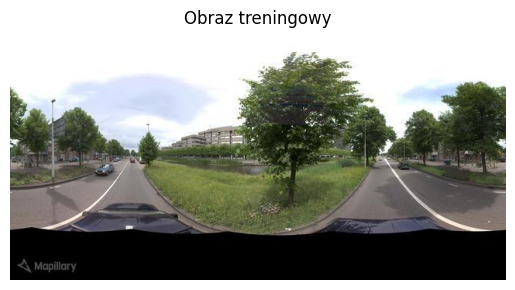

In [ ]:
# <-- IMPORTANT INFO -->
# This code is used to investigate data
# You don't have to run it

print("Liczba zdjęć treningowych:", len(train_files))
print("\n")

print("Struktura danych")


print("Przykłady zdjęć")
img = cv2.imread(train_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Obraz treningowy")
plt.axis('off')
plt.show()

In [ ]:
# <-- IMPORTANT INFO -->
# ImageDataset object returning 3 values - image, label (Country), general_label (continent)

# Important step - normalizing images
full_train_dataset = ImageDataset(train_files, folders_train, country_to_continent, transform=transform)

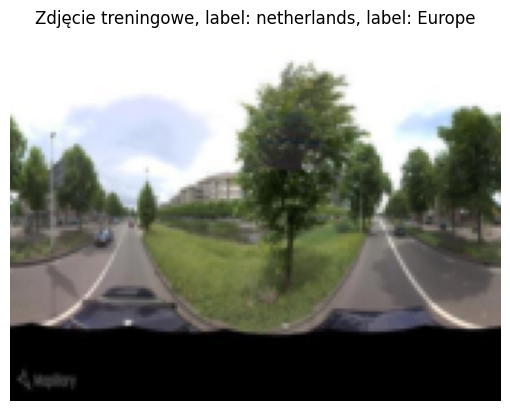

In [ ]:
# <-- IMPORTANT INFO -->
# This code is used to investigate data
# You don't have to run it

image_train, label_train, general_label_train = full_train_dataset[0]
image_np_train = image_train.permute(1, 2, 0).numpy()

plt.imshow(image_np_train)
plt.title(f"Zdjęcie treningowe, label: {label_train}, label: {general_label_train}")
plt.axis('off')
plt.show()

In [ ]:
data_stats(full_train_dataset)

Liczba zdjęć treningowych: 97962


netherlands: 11539 obrazów
jordan: 953 obrazów
india: 12388 obrazów
france: 8480 obrazów
switzerland: 9012 obrazów
kenya: 437 obrazów
canada: 12789 obrazów
norway: 5015 obrazów
usa: 14024 obrazów
brazil: 18989 obrazów
grece: 2466 obrazów
uganda: 1870 obrazów


Europe: 36512 obrazów
Asia: 13341 obrazów
Africa: 2307 obrazów
North America: 26813 obrazów
South America: 18989 obrazów


In [ ]:
# <-- IMPORTANT INFO -->
# Jak można zobaczyć wyżej mamy problem z równomiernym rozkładem datasetu, szczególnie z danymi z Afryki
# Stworzyliśmy dataset z równomiernym rozkładem zdjęć z danych państw poprzez wyrzucenie losowych danych

In [ ]:
# Zanim dane zostaną zredukowane, można spróbować znaleźć inne zbiory danych np. z innych krajów lub dogenerować zdjęcia

#Code with augmentation

In [ ]:
max_count = 20

In [ ]:
def take_images_with_augmentation(folders,max_count):
  all_image_paths = []
  i = 0
  country_to_folder = {}
  for folder in folders.keys():
      if not folders[folder] in country_to_folder.keys():
          country_to_folder[folders[folder]] = []
      country_to_folder[folders[folder]].append(folder)

  for country in country_to_folder.keys():
      folder_images = []
      for folder in country_to_folder[country]:
        for root, _, files in os.walk(folder):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')): # Sprawdź rozszerzenia plików obrazów
                    full_path = os.path.join(root, file)
                    folder_images.append(full_path)
      if len(folder_images) < max_count:
          num_to_add = max_count - len(folder_images)
          additional_paths = random.choices(folder_images, k=num_to_add)
          folder_images.extend(additional_paths)
      all_image_paths.extend(folder_images)

  return all_image_paths
#is one of possibility to transform
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

files_train_augmentation = take_images_with_augmentation(folders_train,max_count)
full_train_dataset_with_augmentation = ImageDataset(files_train_augmentation, folders_train, country_to_continent, transform=train_transform)

In [ ]:
data_stats(full_train_dataset_with_augmentation )

Liczba zdjęć treningowych: 483601


netherlands: 11539 obrazów
jordan: 953 obrazów
hungary: 153321 obrazów
india: 12388 obrazów
russia: 77496 obrazów
france: 8480 obrazów
switzerland: 9012 obrazów
kenya: 437 obrazów
canada: 82545 obrazów
norway: 5015 obrazów
usa: 64267 obrazów
brazil: 18989 obrazów
japan: 34823 obrazów
grece: 2466 obrazów
uganda: 1870 obrazów


Europe: 267329 obrazów
Asia: 48164 obrazów
Africa: 2307 obrazów
North America: 146812 obrazów
South America: 18989 obrazów


In [ ]:
def show_image(image_, label_, general_label_):
  image_np_train = image_.permute(1, 2, 0).numpy()
  plt.imshow(image_np_train)
  plt.title(f"Zdjęcie treningowe, label: {label_}, label: {general_label_}")
  plt.axis('off')
  plt.show()

In [ ]:
train_len = int(0.8 * len(full_train_dataset_with_augmentation))
val_len = len(full_train_dataset_with_augmentation) - train_len
train_dataset, val_dataset_paths = random_split(full_train_dataset_with_augmentation, [train_len, val_len]) # Zwróć uwagę, że walidacyjny zbiór danych na tym etapie nie ma transformacji walidacyjnych

val_image_paths = [files_train_augmentation[i] for i in val_dataset_paths.indices]

val_dataset = ImageDataset(
    val_image_paths,
    targets_dict=full_train_dataset_with_augmentation.targets_dict,
    country_to_continent=full_train_dataset_with_augmentation.country_to_continent,
    transform=transform
)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [ ]:
print("Liczba zdjęć treningowych:", len(train_dataset))
print("Liczba zdjęć walidacyjnych:", len(val_dataset))

Liczba zdjęć treningowych: 386880
Liczba zdjęć walidacyjnych: 96721


In [ ]:
# Przycinanie danych

# 1. Zgrupuj indeksy po krajach
country_to_indices = defaultdict(list)

for idx, path in enumerate(full_train_dataset_with_augmentation.images_paths):
    country = full_train_dataset_with_augmentation.targets_dict[path.rsplit("/", 1)[0]]
    country_to_indices[country].append(idx)

# 2. Znajdź minimalną liczbę zdjęć dla kraju
min_count = min(len(indices) for indices in country_to_indices.values())
print(f"Minimalna liczba zdjęć w kraju: {min_count}")

# 3. Wybierz losowo min_count zdjęć z każdego kraju
balanced_indices = []

for indices in country_to_indices.values():
    balanced_indices.extend(random.sample(indices, min_count))

# 4. Zbuduj nową listę ścieżek
balanced_image_paths = [full_train_dataset_with_augmentation.images_paths[i] for i in balanced_indices]

# 5. Utwórz nowy zbalansowany ImageDataset
balanced_train_dataset = ImageDataset(
    balanced_image_paths,
    targets_dict=full_train_dataset_with_augmentation.targets_dict,
    country_to_continent=full_train_dataset_with_augmentation.country_to_continent,
    transform=full_train_dataset_with_augmentation.transform
)

print(f"Liczba obrazów po undersamplingu: {len(balanced_train_dataset)}")

Minimalna liczba zdjęć w kraju: 437
Liczba obrazów po undersamplingu: 6555


In [ ]:
data_stats(balanced_train_dataset)

Liczba zdjęć treningowych: 6555


netherlands: 437 obrazów
jordan: 437 obrazów
hungary: 437 obrazów
india: 437 obrazów
russia: 437 obrazów
france: 437 obrazów
switzerland: 437 obrazów
kenya: 437 obrazów
canada: 437 obrazów
norway: 437 obrazów
usa: 437 obrazów
brazil: 437 obrazów
japan: 437 obrazów
grece: 437 obrazów
uganda: 437 obrazów


Europe: 3059 obrazów
Asia: 1311 obrazów
Africa: 874 obrazów
North America: 874 obrazów
South America: 437 obrazów


In [ ]:
# Split data to training dataset and validation dataset
train_len = int(0.8 * len(balanced_train_dataset))
val_len = len(balanced_train_dataset) - train_len
train_dataset, val_dataset = random_split(balanced_train_dataset, [train_len, val_len])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

num_epochs = 10

In [ ]:
print("Liczba zdjęć treningowych:", len(train_dataset))
print("Liczba zdjęć walidacyjnych:", len(val_dataset))

Liczba zdjęć treningowych: 5244
Liczba zdjęć walidacyjnych: 1311


In [ ]:
# temp = iter(train_loader)
# example = next(temp)
# print(example[0].shape)

# Ocr, do usunięcia

In [ ]:
# for i in range(200):
#   temp = train_dataset[i]
#   show_image(temp[0],f"id: {i} "+temp[1],temp[2])

In [ ]:
# !pip install easyocr

In [ ]:
# import torchvision
# import torchaudio
# import easyocr
# import numpy as np

In [ ]:
# example = train_dataset[10]

In [ ]:
# temp = (example[0] * 255).permute(1, 2, 0).cpu().numpy().astype(np.uint8)
# gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray, 'gray')

In [ ]:
# all_languages = [
#     'abq', 'en'
# ]

# reader = easyocr.Reader(all_languages, gpu=False)

# results = reader.readtext(gray)

# for bbox, text, conf in results:
#     print(f"Text: {text} (Confidence: {conf:.2f})")

In [ ]:
# Można pisać model

# Model, torch

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
        )

        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [ ]:
import torch
device = ('cpu' if not torch.cuda.is_available() else 'cuda')

num_classes = len(country_to_continent)
model = CNNModel(num_classes).to(device)

In [ ]:
from torch.optim import Adam

lr = 1e-3

optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 5

In [ ]:
country_to_target = {
  "netherlands": 0,
  "jordan": 1,
  "hungary": 2,
  "india": 3,
  "russia": 4,
  "france": 5,
  "switzerland": 6,
  "kenya": 7,
  "canada": 8,
  "norway": 9,
  "usa": 10,
  "brazil": 11,
  "japan": 12,
  "grece": 13,
  "uganda": 14,
}

In [ ]:
def labels_to_targets_helper(labels):
  temp = []
  for i in labels:
    temp.append(country_to_target[i])
  return torch.tensor(temp)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
from tqdm import tqdm

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  correct = 0
  total = 0

  for inputs, label, label_general in tqdm(train_loader):
    label = labels_to_targets_helper(label)
    # inputs = torch.stack([inputs[0], inputs[1]], dim=0)
    inputs, label = inputs.to(device), label.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, label)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    train_loss += loss.item() * inputs.size(0)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == label).sum().item()
    total += label.size(0)

    print(f"loss: {loss.item()}")

  train_loss /= total
  train_acc = correct / total

  # Validation
  model.eval()
  val_loss = 0.0
  correct_val = 0
  total_val = 0

  with torch.no_grad():
    for inputs, label, label_general in tqdm(val_loader):
      label = labels_to_targets_helper(label)
      # inputs = torch.stack([inputs[0], inputs[1]], dim=0)
      inputs, label = inputs.to(device), label.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, label)

      val_loss += loss.item() * inputs.size(0)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == label).sum().item()
      total_val += label.size(0)

  val_loss /= total_val
  val_acc = correct / total_val

  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracies.append(train_acc)
  val_accuracies.append(val_acc)

  print(f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

  0%|          | 1/328 [00:25<2:19:30, 25.60s/it]

loss: 2.863105058670044


  1%|          | 2/328 [00:38<1:38:55, 18.21s/it]

loss: 2.663806915283203


  1%|          | 3/328 [00:51<1:26:03, 15.89s/it]

loss: 2.625509262084961


  1%|          | 4/328 [01:05<1:20:37, 14.93s/it]

loss: 2.647162675857544


  2%|▏         | 5/328 [01:17<1:16:10, 14.15s/it]

loss: 2.891451120376587


  2%|▏         | 6/328 [01:30<1:12:37, 13.53s/it]

loss: 2.6902647018432617


  2%|▏         | 7/328 [01:44<1:13:36, 13.76s/it]

loss: 2.6358375549316406


  2%|▏         | 8/328 [01:56<1:10:53, 13.29s/it]

loss: 2.794788360595703


  3%|▎         | 9/328 [02:10<1:11:59, 13.54s/it]

loss: 2.577216148376465


  3%|▎         | 10/328 [02:23<1:10:01, 13.21s/it]

loss: 2.762310028076172


  3%|▎         | 11/328 [02:36<1:09:32, 13.16s/it]

loss: 2.6011104583740234


  4%|▎         | 12/328 [02:49<1:08:40, 13.04s/it]

loss: 2.539734363555908


  4%|▍         | 13/328 [03:02<1:08:38, 13.08s/it]

loss: 2.6452701091766357


  4%|▍         | 14/328 [03:16<1:09:26, 13.27s/it]

loss: 2.6838693618774414


  5%|▍         | 15/328 [03:29<1:09:00, 13.23s/it]

loss: 2.472050666809082


  5%|▍         | 16/328 [03:42<1:09:01, 13.27s/it]

loss: 2.544008255004883


  5%|▌         | 17/328 [03:56<1:09:58, 13.50s/it]

loss: 2.3836607933044434


  5%|▌         | 18/328 [04:08<1:07:00, 12.97s/it]

loss: 2.6092946529388428


  6%|▌         | 19/328 [04:20<1:05:54, 12.80s/it]

loss: 2.8478410243988037


  6%|▌         | 20/328 [04:33<1:06:02, 12.87s/it]

loss: 2.637324094772339


  6%|▋         | 21/328 [04:48<1:08:18, 13.35s/it]

loss: 2.6639389991760254


  7%|▋         | 22/328 [05:00<1:05:56, 12.93s/it]

loss: 2.5552456378936768


  7%|▋         | 23/328 [05:12<1:04:55, 12.77s/it]

loss: 2.599095582962036


  7%|▋         | 24/328 [05:25<1:04:28, 12.72s/it]

loss: 2.6221461296081543


  8%|▊         | 25/328 [05:37<1:03:17, 12.53s/it]

loss: 2.2569730281829834


  8%|▊         | 26/328 [05:50<1:03:53, 12.69s/it]

loss: 2.591104030609131


  8%|▊         | 27/328 [06:02<1:03:31, 12.66s/it]

loss: 2.6972262859344482


  9%|▊         | 28/328 [06:15<1:02:36, 12.52s/it]

loss: 2.8073318004608154


  9%|▉         | 29/328 [06:37<1:16:42, 15.39s/it]

loss: 2.691490411758423


  9%|▉         | 30/328 [06:50<1:13:36, 14.82s/it]

loss: 2.3065950870513916


  9%|▉         | 31/328 [07:04<1:11:32, 14.45s/it]

loss: 2.5412709712982178


 10%|▉         | 32/328 [07:17<1:09:08, 14.01s/it]

loss: 2.6434385776519775


 10%|█         | 33/328 [07:30<1:07:06, 13.65s/it]

loss: 2.565906286239624


 10%|█         | 34/328 [07:42<1:04:48, 13.23s/it]

loss: 2.5887949466705322


 11%|█         | 35/328 [07:55<1:04:26, 13.20s/it]

loss: 2.497042655944824


 11%|█         | 36/328 [08:08<1:03:55, 13.13s/it]

loss: 2.531128168106079


 11%|█▏        | 37/328 [08:21<1:04:11, 13.23s/it]

loss: 2.584975242614746


 12%|█▏        | 38/328 [08:34<1:03:18, 13.10s/it]

loss: 2.5059900283813477


 12%|█▏        | 39/328 [08:46<1:01:17, 12.73s/it]

loss: 2.3017959594726562


 12%|█▏        | 40/328 [08:59<1:01:19, 12.78s/it]

loss: 2.790400505065918


 12%|█▎        | 41/328 [09:11<1:00:25, 12.63s/it]

loss: 2.440176248550415


 13%|█▎        | 42/328 [09:24<1:00:42, 12.74s/it]

loss: 2.4138481616973877


 13%|█▎        | 43/328 [09:37<59:56, 12.62s/it]  

loss: 2.271681308746338


 13%|█▎        | 44/328 [09:50<1:00:14, 12.73s/it]

loss: 2.3982350826263428


 14%|█▎        | 45/328 [10:02<59:30, 12.62s/it]  

loss: 2.8154289722442627


 14%|█▍        | 46/328 [10:15<59:42, 12.70s/it]

loss: 2.603015661239624


 14%|█▍        | 47/328 [10:27<59:04, 12.61s/it]

loss: 2.5869157314300537


 15%|█▍        | 48/328 [10:40<59:15, 12.70s/it]

loss: 2.5235791206359863


 15%|█▍        | 49/328 [10:52<58:26, 12.57s/it]

loss: 2.3673243522644043


 15%|█▌        | 50/328 [11:05<58:22, 12.60s/it]

loss: 2.5309152603149414


 16%|█▌        | 51/328 [11:17<57:31, 12.46s/it]

loss: 2.642882823944092


 16%|█▌        | 52/328 [11:30<57:44, 12.55s/it]

loss: 2.8313984870910645


 16%|█▌        | 53/328 [11:42<56:21, 12.30s/it]

loss: 2.580040454864502


 16%|█▋        | 54/328 [11:54<56:49, 12.45s/it]

loss: 2.434182643890381


 17%|█▋        | 55/328 [12:07<56:57, 12.52s/it]

loss: 2.262457847595215


 17%|█▋        | 56/328 [12:20<57:48, 12.75s/it]

loss: 2.662112236022949


 17%|█▋        | 57/328 [12:33<56:47, 12.57s/it]

loss: 2.4540369510650635


 18%|█▊        | 58/328 [12:45<56:48, 12.62s/it]

loss: 2.4374730587005615


 18%|█▊        | 59/328 [12:59<57:20, 12.79s/it]

loss: 2.734010696411133


 18%|█▊        | 60/328 [13:11<56:12, 12.58s/it]

loss: 2.5289556980133057


 19%|█▊        | 61/328 [13:23<56:10, 12.63s/it]

loss: 2.374729633331299


 19%|█▉        | 62/328 [13:36<56:36, 12.77s/it]

loss: 2.471078395843506


 19%|█▉        | 63/328 [13:49<55:41, 12.61s/it]

loss: 2.3668627738952637


 20%|█▉        | 64/328 [14:00<54:16, 12.34s/it]

loss: 2.330172538757324


 20%|█▉        | 65/328 [14:13<54:34, 12.45s/it]

loss: 2.4769675731658936


 20%|██        | 66/328 [14:26<55:14, 12.65s/it]

loss: 2.3858182430267334


 20%|██        | 67/328 [14:38<54:09, 12.45s/it]

loss: 2.602426290512085


 21%|██        | 68/328 [14:51<54:39, 12.61s/it]

loss: 2.4027562141418457


 21%|██        | 69/328 [15:04<54:18, 12.58s/it]

loss: 2.4419424533843994


 21%|██▏       | 70/328 [15:17<54:27, 12.66s/it]

loss: 2.6539437770843506


 22%|██▏       | 71/328 [15:29<53:36, 12.52s/it]

loss: 2.481518030166626


 22%|██▏       | 72/328 [15:40<52:19, 12.26s/it]

loss: 2.42006778717041


 22%|██▏       | 73/328 [15:54<53:29, 12.59s/it]

loss: 2.2500216960906982


 23%|██▎       | 74/328 [16:07<53:43, 12.69s/it]

loss: 2.565645217895508


 23%|██▎       | 75/328 [16:20<54:16, 12.87s/it]

loss: 2.403203010559082


 23%|██▎       | 76/328 [16:33<54:26, 12.96s/it]

loss: 2.529531240463257


 23%|██▎       | 77/328 [16:45<53:16, 12.74s/it]

loss: 2.6288297176361084


 24%|██▍       | 78/328 [16:58<53:19, 12.80s/it]

loss: 2.585880756378174


 24%|██▍       | 79/328 [17:10<52:18, 12.60s/it]

loss: 2.7078137397766113


 24%|██▍       | 80/328 [17:24<52:40, 12.74s/it]

loss: 2.5709726810455322


 25%|██▍       | 81/328 [17:36<51:32, 12.52s/it]

loss: 2.635911464691162


 25%|██▌       | 82/328 [17:48<50:50, 12.40s/it]

loss: 2.6417524814605713


 25%|██▌       | 83/328 [18:01<51:39, 12.65s/it]

loss: 2.501890182495117


 26%|██▌       | 84/328 [18:14<51:53, 12.76s/it]

loss: 2.663074254989624


 26%|██▌       | 85/328 [18:26<50:37, 12.50s/it]

loss: 2.439244031906128


 26%|██▌       | 86/328 [18:39<50:47, 12.59s/it]

loss: 2.5335209369659424


 27%|██▋       | 87/328 [18:52<51:25, 12.80s/it]

loss: 2.762315273284912


 27%|██▋       | 88/328 [19:04<50:45, 12.69s/it]

loss: 2.580185651779175


 27%|██▋       | 89/328 [19:17<50:37, 12.71s/it]

loss: 2.410496711730957


 27%|██▋       | 90/328 [19:29<49:42, 12.53s/it]

loss: 2.3011116981506348


 28%|██▊       | 91/328 [19:42<49:43, 12.59s/it]

loss: 2.3732175827026367


 28%|██▊       | 92/328 [19:54<48:59, 12.46s/it]

loss: 2.2193329334259033


 28%|██▊       | 93/328 [20:06<48:15, 12.32s/it]

loss: 2.2921302318573


 29%|██▊       | 94/328 [20:19<48:44, 12.50s/it]

loss: 2.13173770904541


 29%|██▉       | 95/328 [20:31<47:54, 12.34s/it]

loss: 2.5481553077697754


 29%|██▉       | 96/328 [20:44<48:00, 12.41s/it]

loss: 2.5694496631622314


 30%|██▉       | 97/328 [20:56<48:14, 12.53s/it]

loss: 2.1939659118652344


 30%|██▉       | 98/328 [21:09<48:18, 12.60s/it]

loss: 2.567431688308716


 30%|███       | 99/328 [21:21<47:10, 12.36s/it]

loss: 2.4821131229400635


 30%|███       | 100/328 [21:34<48:07, 12.66s/it]

loss: 2.348906993865967


 31%|███       | 101/328 [21:48<48:55, 12.93s/it]

loss: 2.7414941787719727


 31%|███       | 102/328 [22:01<48:30, 12.88s/it]

loss: 2.223524808883667


 31%|███▏      | 103/328 [22:13<47:48, 12.75s/it]

loss: 2.182873487472534


 32%|███▏      | 104/328 [22:26<47:47, 12.80s/it]

loss: 2.376030921936035


 32%|███▏      | 105/328 [22:39<48:12, 12.97s/it]

loss: 2.3322010040283203


 32%|███▏      | 106/328 [22:52<47:17, 12.78s/it]

loss: 2.5597317218780518


 33%|███▎      | 107/328 [23:05<47:09, 12.80s/it]

loss: 2.615884780883789


 33%|███▎      | 108/328 [23:17<46:23, 12.65s/it]

loss: 2.4469480514526367


 33%|███▎      | 109/328 [23:30<46:41, 12.79s/it]

loss: 2.420626401901245


 34%|███▎      | 110/328 [23:43<47:18, 13.02s/it]

loss: 2.158358573913574


 34%|███▍      | 111/328 [23:57<47:32, 13.15s/it]

loss: 2.5107421875


 34%|███▍      | 112/328 [24:10<47:39, 13.24s/it]

loss: 2.305715322494507


 34%|███▍      | 113/328 [24:23<46:27, 12.97s/it]

loss: 2.1374170780181885


 35%|███▍      | 114/328 [24:36<46:04, 12.92s/it]

loss: 2.4272851943969727


 35%|███▌      | 115/328 [24:49<46:14, 13.03s/it]

loss: 2.36163067817688


 35%|███▌      | 116/328 [25:01<45:08, 12.78s/it]

loss: 2.419931173324585


 36%|███▌      | 117/328 [25:14<45:01, 12.80s/it]

loss: 2.4647109508514404


 36%|███▌      | 118/328 [25:26<44:05, 12.60s/it]

loss: 2.563136577606201


 36%|███▋      | 119/328 [25:38<43:43, 12.55s/it]

loss: 2.6415679454803467


 37%|███▋      | 120/328 [25:51<43:52, 12.66s/it]

loss: 2.4956846237182617


 37%|███▋      | 121/328 [26:04<43:39, 12.65s/it]

loss: 2.588378429412842


 37%|███▋      | 122/328 [26:16<42:41, 12.43s/it]

loss: 2.598130226135254


 38%|███▊      | 123/328 [26:28<41:53, 12.26s/it]

loss: 2.315450668334961


 38%|███▊      | 124/328 [26:41<42:18, 12.44s/it]

loss: 2.376150131225586


 38%|███▊      | 125/328 [26:53<41:54, 12.39s/it]

loss: 2.684349298477173


 38%|███▊      | 126/328 [27:06<42:01, 12.48s/it]

loss: 2.395988941192627


 39%|███▊      | 127/328 [27:18<41:28, 12.38s/it]

loss: 2.450693130493164


 39%|███▉      | 128/328 [27:39<50:14, 15.07s/it]

loss: 2.4426491260528564


 39%|███▉      | 129/328 [27:53<48:26, 14.61s/it]

loss: 2.553349018096924


 40%|███▉      | 130/328 [28:04<45:28, 13.78s/it]

loss: 2.2631006240844727


 40%|███▉      | 131/328 [28:17<44:31, 13.56s/it]

loss: 2.494508743286133


 40%|████      | 132/328 [28:30<43:03, 13.18s/it]

loss: 2.589573860168457


 41%|████      | 133/328 [28:42<41:36, 12.80s/it]

loss: 2.7359864711761475


 41%|████      | 134/328 [28:55<41:28, 12.83s/it]

loss: 2.5504186153411865


 41%|████      | 135/328 [29:07<40:45, 12.67s/it]

loss: 2.6396327018737793


 41%|████▏     | 136/328 [29:20<40:48, 12.75s/it]

loss: 2.477937698364258


 42%|████▏     | 137/328 [29:32<40:03, 12.59s/it]

loss: 2.593689203262329


 42%|████▏     | 138/328 [29:45<40:36, 12.82s/it]

loss: 2.650555372238159


 42%|████▏     | 139/328 [29:58<40:38, 12.90s/it]

loss: 2.3134381771087646


 43%|████▎     | 140/328 [30:11<39:57, 12.75s/it]

loss: 2.3993420600891113


 43%|████▎     | 141/328 [30:24<39:54, 12.81s/it]

loss: 2.2020390033721924


 43%|████▎     | 142/328 [30:37<40:17, 13.00s/it]

loss: 2.646768569946289


 44%|████▎     | 143/328 [30:51<40:49, 13.24s/it]

loss: 2.3940610885620117


 44%|████▍     | 144/328 [31:04<40:26, 13.19s/it]

loss: 2.2887163162231445


 44%|████▍     | 145/328 [31:17<39:34, 12.97s/it]

loss: 2.298100709915161


 45%|████▍     | 146/328 [31:29<39:15, 12.94s/it]

loss: 2.379143476486206


 45%|████▍     | 147/328 [31:43<39:31, 13.10s/it]

loss: 2.3019769191741943


 45%|████▌     | 148/328 [31:55<38:20, 12.78s/it]

loss: 2.493750810623169


 45%|████▌     | 149/328 [32:08<38:14, 12.82s/it]

loss: 2.5330862998962402


 46%|████▌     | 150/328 [32:22<38:47, 13.08s/it]

loss: 2.3395426273345947


 46%|████▌     | 151/328 [32:35<38:44, 13.13s/it]

loss: 2.783710479736328


 46%|████▋     | 152/328 [32:48<38:22, 13.08s/it]

loss: 2.497100830078125


 47%|████▋     | 153/328 [33:00<37:05, 12.71s/it]

loss: 2.5040059089660645


 47%|████▋     | 154/328 [33:13<36:59, 12.76s/it]

loss: 2.5538017749786377


 47%|████▋     | 155/328 [33:30<40:32, 14.06s/it]

loss: 2.27852201461792


 48%|████▊     | 156/328 [33:43<39:36, 13.82s/it]

loss: 2.705151081085205


 48%|████▊     | 157/328 [33:57<39:41, 13.93s/it]

loss: 2.8350274562835693


 48%|████▊     | 158/328 [34:10<38:25, 13.56s/it]

loss: 2.4610884189605713


 48%|████▊     | 159/328 [34:21<36:35, 12.99s/it]

loss: 2.3694307804107666


 49%|████▉     | 160/328 [34:36<37:55, 13.54s/it]

loss: 2.489100694656372


 49%|████▉     | 161/328 [34:49<37:03, 13.32s/it]

loss: 2.6243817806243896


 49%|████▉     | 162/328 [35:02<36:44, 13.28s/it]

loss: 2.4745075702667236


 50%|████▉     | 163/328 [35:16<36:56, 13.43s/it]

loss: 2.3880412578582764


 50%|█████     | 164/328 [35:29<36:34, 13.38s/it]

loss: 2.650299549102783


 50%|█████     | 165/328 [35:42<36:04, 13.28s/it]

loss: 2.3485827445983887


 51%|█████     | 166/328 [35:56<36:34, 13.55s/it]

loss: 2.2747340202331543


 51%|█████     | 167/328 [36:09<35:51, 13.36s/it]

loss: 2.4941673278808594


 51%|█████     | 168/328 [36:23<35:32, 13.33s/it]

loss: 2.439448833465576


 52%|█████▏    | 169/328 [36:35<34:49, 13.14s/it]

loss: 2.5818512439727783


 52%|█████▏    | 170/328 [36:47<33:40, 12.79s/it]

loss: 2.5591354370117188


 52%|█████▏    | 171/328 [36:59<32:45, 12.52s/it]

loss: 2.5404622554779053


 52%|█████▏    | 172/328 [37:12<32:57, 12.68s/it]

loss: 2.4910435676574707


 53%|█████▎    | 173/328 [37:25<32:25, 12.55s/it]

loss: 2.0409302711486816


 53%|█████▎    | 174/328 [37:38<32:48, 12.79s/it]

loss: 2.4940338134765625


 53%|█████▎    | 175/328 [37:52<33:48, 13.26s/it]

loss: 2.2192916870117188


 54%|█████▎    | 176/328 [38:05<32:55, 13.00s/it]

loss: 2.3017725944519043


 54%|█████▍    | 177/328 [38:18<32:43, 13.01s/it]

loss: 2.2627370357513428


 54%|█████▍    | 178/328 [38:30<32:02, 12.82s/it]

loss: 2.5070676803588867


 55%|█████▍    | 179/328 [38:43<32:16, 13.00s/it]

loss: 2.1860859394073486


 55%|█████▍    | 180/328 [38:56<31:56, 12.95s/it]

loss: 2.4206619262695312


 55%|█████▌    | 181/328 [39:10<32:00, 13.07s/it]

loss: 2.3021857738494873


 55%|█████▌    | 182/328 [39:22<31:15, 12.85s/it]

loss: 2.3741390705108643


 56%|█████▌    | 183/328 [39:35<31:04, 12.86s/it]

loss: 2.414900779724121


 56%|█████▌    | 184/328 [39:48<31:10, 12.99s/it]

loss: 2.5932610034942627


 56%|█████▋    | 185/328 [40:01<31:10, 13.08s/it]

loss: 2.5154519081115723


 57%|█████▋    | 186/328 [40:14<30:15, 12.78s/it]

loss: 2.235501766204834


 57%|█████▋    | 187/328 [40:27<30:31, 12.99s/it]

loss: 2.570072650909424


 57%|█████▋    | 188/328 [40:39<29:24, 12.60s/it]

loss: 2.315767288208008


 58%|█████▊    | 189/328 [40:51<28:58, 12.51s/it]

loss: 2.673670768737793


 58%|█████▊    | 190/328 [41:02<27:52, 12.12s/it]

loss: 2.479860782623291


 58%|█████▊    | 191/328 [41:15<27:49, 12.18s/it]

loss: 2.671212911605835


 59%|█████▊    | 192/328 [41:26<26:58, 11.90s/it]

loss: 2.4356579780578613


 59%|█████▉    | 193/328 [41:38<27:16, 12.12s/it]

loss: 2.303656816482544


 59%|█████▉    | 194/328 [41:51<27:27, 12.29s/it]

loss: 2.189321756362915


 59%|█████▉    | 195/328 [42:03<27:01, 12.19s/it]

loss: 2.4185922145843506


 60%|█████▉    | 196/328 [42:16<27:08, 12.34s/it]

loss: 2.156142234802246


 60%|██████    | 197/328 [42:28<26:55, 12.33s/it]

loss: 2.2646303176879883


 60%|██████    | 198/328 [42:40<26:29, 12.23s/it]

loss: 2.25142765045166


 61%|██████    | 199/328 [42:52<26:22, 12.27s/it]

loss: 2.491194009780884


 61%|██████    | 200/328 [43:05<26:05, 12.23s/it]

loss: 2.2563250064849854


 61%|██████▏   | 201/328 [43:17<26:05, 12.33s/it]

loss: 2.199263572692871


 62%|██████▏   | 202/328 [43:37<30:38, 14.59s/it]

loss: 2.8022520542144775


 62%|██████▏   | 203/328 [43:49<28:47, 13.82s/it]

loss: 2.280193567276001


 62%|██████▏   | 204/328 [44:01<27:25, 13.27s/it]

loss: 2.8722450733184814


 62%|██████▎   | 205/328 [44:13<26:25, 12.89s/it]

loss: 2.8731560707092285


 63%|██████▎   | 206/328 [44:24<25:20, 12.46s/it]

loss: 2.953880548477173


 63%|██████▎   | 207/328 [44:37<25:12, 12.50s/it]

loss: 2.5942881107330322


 63%|██████▎   | 208/328 [44:48<24:12, 12.10s/it]

loss: 2.321964979171753


 64%|██████▎   | 209/328 [44:59<23:23, 11.80s/it]

loss: 2.3063507080078125


 64%|██████▍   | 210/328 [45:17<26:38, 13.54s/it]

loss: 2.2549901008605957


 64%|██████▍   | 211/328 [45:29<25:17, 12.97s/it]

loss: 2.4133129119873047


 65%|██████▍   | 212/328 [45:49<29:17, 15.15s/it]

loss: 2.400195598602295


 65%|██████▍   | 213/328 [46:01<27:21, 14.28s/it]

loss: 2.5286340713500977


 65%|██████▌   | 214/328 [46:12<25:20, 13.34s/it]

loss: 2.226047992706299


 66%|██████▌   | 215/328 [46:24<24:23, 12.96s/it]

loss: 2.477135181427002


 66%|██████▌   | 216/328 [46:36<23:34, 12.63s/it]

loss: 2.3796298503875732


 66%|██████▌   | 217/328 [46:47<22:38, 12.24s/it]

loss: 2.1821277141571045


 66%|██████▋   | 218/328 [47:00<22:28, 12.26s/it]

loss: 2.3819892406463623


 67%|██████▋   | 219/328 [47:11<21:54, 12.06s/it]

loss: 2.4130544662475586


 67%|██████▋   | 220/328 [47:23<21:33, 11.98s/it]

loss: 2.4048027992248535


 67%|██████▋   | 221/328 [47:36<21:46, 12.21s/it]

loss: 2.168660879135132


 68%|██████▊   | 222/328 [47:48<21:42, 12.29s/it]

loss: 1.9519028663635254


 68%|██████▊   | 223/328 [48:02<21:58, 12.56s/it]

loss: 2.3083436489105225


 68%|██████▊   | 224/328 [48:13<21:27, 12.38s/it]

loss: 2.214876890182495


 69%|██████▊   | 225/328 [48:26<21:06, 12.30s/it]

loss: 2.163153648376465


 69%|██████▉   | 226/328 [48:38<21:07, 12.43s/it]

loss: 2.382357597351074


 69%|██████▉   | 227/328 [48:50<20:43, 12.31s/it]

loss: 2.6593921184539795


 70%|██████▉   | 228/328 [49:02<20:11, 12.11s/it]

loss: 2.3436858654022217


 70%|██████▉   | 229/328 [49:14<20:06, 12.19s/it]

loss: 2.3863072395324707


 70%|███████   | 230/328 [49:29<20:59, 12.85s/it]

loss: 2.623256206512451


 70%|███████   | 231/328 [49:47<23:30, 14.54s/it]

loss: 2.6506354808807373


 71%|███████   | 232/328 [49:59<21:43, 13.58s/it]

loss: 2.45620059967041


 71%|███████   | 233/328 [50:11<20:45, 13.12s/it]

loss: 2.1289188861846924


 71%|███████▏  | 234/328 [50:26<21:48, 13.92s/it]

loss: 2.3069827556610107


 72%|███████▏  | 235/328 [50:39<21:00, 13.56s/it]

loss: 2.1646039485931396


 72%|███████▏  | 236/328 [50:51<20:03, 13.08s/it]

loss: 2.593214511871338


 72%|███████▏  | 237/328 [51:04<19:59, 13.18s/it]

loss: 2.274613618850708


 73%|███████▎  | 238/328 [51:17<19:33, 13.04s/it]

loss: 2.202298641204834


 73%|███████▎  | 239/328 [51:30<19:14, 12.97s/it]

loss: 2.480837821960449


 73%|███████▎  | 240/328 [51:43<18:53, 12.88s/it]

loss: 2.346529006958008


 73%|███████▎  | 241/328 [51:55<18:16, 12.60s/it]

loss: 2.6640737056732178


 74%|███████▍  | 242/328 [52:06<17:36, 12.28s/it]

loss: 2.5294103622436523


 74%|███████▍  | 243/328 [52:18<17:04, 12.05s/it]

loss: 2.5659706592559814


 74%|███████▍  | 244/328 [52:30<16:56, 12.11s/it]

loss: 2.3376553058624268


 75%|███████▍  | 245/328 [52:43<16:57, 12.26s/it]

loss: 2.354552984237671


 75%|███████▌  | 246/328 [52:55<16:55, 12.38s/it]

loss: 2.029003858566284


 75%|███████▌  | 247/328 [53:08<16:51, 12.49s/it]

loss: 2.4610366821289062


 76%|███████▌  | 248/328 [53:19<16:03, 12.05s/it]

loss: 2.398263931274414


 76%|███████▌  | 249/328 [53:32<16:03, 12.20s/it]

loss: 2.678058385848999


 76%|███████▌  | 250/328 [53:43<15:27, 11.90s/it]

loss: 2.6806037425994873


 77%|███████▋  | 251/328 [53:54<15:05, 11.76s/it]

loss: 2.5798418521881104


 77%|███████▋  | 252/328 [54:07<15:23, 12.15s/it]

loss: 2.304318428039551


 77%|███████▋  | 253/328 [54:19<14:53, 11.91s/it]

loss: 2.43985652923584


 77%|███████▋  | 254/328 [54:31<14:45, 11.97s/it]

loss: 2.3479275703430176


 78%|███████▊  | 255/328 [54:43<14:39, 12.05s/it]

loss: 2.392576217651367


 78%|███████▊  | 256/328 [54:54<14:04, 11.73s/it]

loss: 2.55938982963562


 78%|███████▊  | 257/328 [55:06<14:00, 11.84s/it]

loss: 2.1862173080444336


 79%|███████▊  | 258/328 [55:18<13:42, 11.75s/it]

loss: 2.434290885925293


 79%|███████▉  | 259/328 [55:29<13:19, 11.59s/it]

loss: 2.5253543853759766


 79%|███████▉  | 260/328 [55:41<13:17, 11.72s/it]

loss: 2.3818612098693848


 80%|███████▉  | 261/328 [55:53<13:05, 11.72s/it]

loss: 2.1518921852111816


 80%|███████▉  | 262/328 [56:06<13:34, 12.33s/it]

loss: 2.474708318710327


 80%|████████  | 263/328 [56:21<13:59, 12.91s/it]

loss: 2.740269184112549


 80%|████████  | 264/328 [56:33<13:29, 12.65s/it]

loss: 2.232142448425293


 81%|████████  | 265/328 [56:45<13:08, 12.51s/it]

loss: 2.747466802597046


 81%|████████  | 266/328 [57:11<17:09, 16.60s/it]

loss: 2.447265625


 81%|████████▏ | 267/328 [57:23<15:33, 15.30s/it]

loss: 2.3534317016601562


 82%|████████▏ | 268/328 [57:35<14:22, 14.37s/it]

loss: 2.096999168395996


 82%|████████▏ | 269/328 [57:46<12:57, 13.18s/it]

loss: 2.3018946647644043


 82%|████████▏ | 270/328 [57:57<12:06, 12.53s/it]

loss: 2.7353932857513428


 83%|████████▎ | 271/328 [58:08<11:29, 12.10s/it]

loss: 2.485842704772949


 83%|████████▎ | 272/328 [58:19<11:07, 11.92s/it]

loss: 2.3912758827209473


 83%|████████▎ | 273/328 [58:32<11:00, 12.01s/it]

loss: 2.7360339164733887


 84%|████████▎ | 274/328 [58:43<10:42, 11.90s/it]

loss: 2.6337876319885254


 84%|████████▍ | 275/328 [58:54<10:17, 11.65s/it]

loss: 2.333651065826416


 84%|████████▍ | 276/328 [59:09<10:53, 12.56s/it]

loss: 2.6556918621063232


 84%|████████▍ | 277/328 [59:21<10:34, 12.45s/it]

loss: 2.4131112098693848


 85%|████████▍ | 278/328 [59:33<10:10, 12.22s/it]

loss: 2.1107335090637207


 85%|████████▌ | 279/328 [59:44<09:43, 11.91s/it]

loss: 2.2068705558776855


 85%|████████▌ | 280/328 [59:56<09:31, 11.91s/it]

loss: 2.218644380569458


 86%|████████▌ | 281/328 [1:00:07<09:04, 11.58s/it]

loss: 2.5867342948913574


 86%|████████▌ | 282/328 [1:00:18<08:53, 11.59s/it]

loss: 2.528679132461548


 86%|████████▋ | 283/328 [1:00:31<08:53, 11.86s/it]

loss: 2.0500621795654297


 87%|████████▋ | 284/328 [1:00:43<08:40, 11.83s/it]

loss: 2.451672315597534


 87%|████████▋ | 285/328 [1:00:54<08:18, 11.60s/it]

loss: 2.643353223800659


 87%|████████▋ | 286/328 [1:01:05<08:01, 11.47s/it]

loss: 2.456247329711914


 88%|████████▊ | 287/328 [1:01:16<07:50, 11.47s/it]

loss: 2.5424675941467285


 88%|████████▊ | 288/328 [1:01:28<07:34, 11.37s/it]

loss: 2.287933826446533


 88%|████████▊ | 289/328 [1:01:39<07:25, 11.43s/it]

loss: 2.405795097351074


 88%|████████▊ | 290/328 [1:01:51<07:24, 11.70s/it]

loss: 2.645258903503418


 89%|████████▊ | 291/328 [1:02:09<08:23, 13.62s/it]

loss: 2.1443910598754883


 89%|████████▉ | 292/328 [1:02:20<07:38, 12.75s/it]

loss: 2.312802791595459


 89%|████████▉ | 293/328 [1:02:29<06:48, 11.67s/it]

loss: 2.3147475719451904


 90%|████████▉ | 294/328 [1:02:38<06:05, 10.76s/it]

loss: 2.300208806991577


 90%|████████▉ | 295/328 [1:02:47<05:33, 10.10s/it]

loss: 2.4578349590301514


 90%|█████████ | 296/328 [1:02:56<05:14,  9.84s/it]

loss: 2.6775660514831543


 91%|█████████ | 297/328 [1:03:04<04:50,  9.36s/it]

loss: 2.402806043624878


 91%|█████████ | 298/328 [1:03:14<04:48,  9.62s/it]

loss: 2.4591286182403564


 91%|█████████ | 299/328 [1:03:24<04:36,  9.53s/it]

loss: 2.4575090408325195


 91%|█████████▏| 300/328 [1:03:42<05:41, 12.21s/it]

loss: 2.5505166053771973


 92%|█████████▏| 301/328 [1:03:51<05:06, 11.34s/it]

loss: 2.2702560424804688


 92%|█████████▏| 302/328 [1:04:08<05:34, 12.86s/it]

loss: 2.159299612045288


 92%|█████████▏| 303/328 [1:04:20<05:19, 12.80s/it]

loss: 2.297128438949585


 93%|█████████▎| 304/328 [1:04:30<04:40, 11.70s/it]

loss: 2.601081371307373


 93%|█████████▎| 305/328 [1:04:43<04:39, 12.17s/it]

loss: 2.4690260887145996


 93%|█████████▎| 306/328 [1:05:03<05:17, 14.45s/it]

loss: 2.4754605293273926


 94%|█████████▎| 307/328 [1:05:12<04:31, 12.91s/it]

loss: 2.6048834323883057


 94%|█████████▍| 308/328 [1:05:21<03:56, 11.81s/it]

loss: 2.6269426345825195


 94%|█████████▍| 309/328 [1:05:29<03:22, 10.68s/it]

loss: 2.5057523250579834


 95%|█████████▍| 310/328 [1:05:44<03:33, 11.86s/it]

loss: 2.35658597946167


 95%|█████████▍| 311/328 [1:05:53<03:08, 11.10s/it]

loss: 2.463771104812622


 95%|█████████▌| 312/328 [1:06:02<02:48, 10.54s/it]

loss: 2.421799421310425


 95%|█████████▌| 313/328 [1:06:10<02:26,  9.78s/it]

loss: 2.59503436088562


 96%|█████████▌| 314/328 [1:06:20<02:14,  9.62s/it]

loss: 2.149509906768799


 96%|█████████▌| 315/328 [1:06:33<02:19, 10.74s/it]

loss: 2.2496395111083984


 96%|█████████▋| 316/328 [1:06:42<02:03, 10.32s/it]

loss: 2.5418455600738525


 97%|█████████▋| 317/328 [1:06:51<01:46,  9.70s/it]

loss: 2.589383840560913


 97%|█████████▋| 318/328 [1:07:13<02:14, 13.50s/it]

loss: 2.893770217895508


 97%|█████████▋| 319/328 [1:07:41<02:40, 17.84s/it]

loss: 2.436779022216797


 98%|█████████▊| 320/328 [1:08:04<02:34, 19.36s/it]

loss: 2.4440646171569824


 98%|█████████▊| 321/328 [1:08:29<02:28, 21.25s/it]

loss: 2.0691685676574707


 98%|█████████▊| 322/328 [1:08:55<02:15, 22.52s/it]

loss: 2.1821987628936768


 98%|█████████▊| 323/328 [1:09:23<02:01, 24.20s/it]

loss: 2.006127119064331


 99%|█████████▉| 324/328 [1:09:30<01:15, 18.95s/it]

loss: 2.2631452083587646


 99%|█████████▉| 325/328 [1:09:36<00:45, 15.02s/it]

loss: 2.496006727218628


 99%|█████████▉| 326/328 [1:09:43<00:25, 12.72s/it]

loss: 2.417799949645996


100%|█████████▉| 327/328 [1:09:49<00:10, 10.81s/it]

loss: 2.2540886402130127


100%|██████████| 328/328 [1:09:54<00:00, 12.79s/it]


loss: 2.408702850341797


100%|██████████| 82/82 [08:53<00:00,  6.51s/it]


Epoch [1/5] | Train Loss: 2.4610, Train Acc: 0.2090 | Val Loss: 2.3545, Val Acc: 0.8360


  0%|          | 1/328 [00:00<03:33,  1.53it/s]

loss: 2.438659191131592


  1%|          | 2/328 [00:01<03:43,  1.46it/s]

loss: 2.030640125274658


  1%|          | 3/328 [00:02<03:37,  1.49it/s]

loss: 2.343402862548828


  1%|          | 4/328 [00:02<03:53,  1.39it/s]

loss: 2.518786907196045


  2%|▏         | 5/328 [00:03<04:22,  1.23it/s]

loss: 2.861349105834961


  2%|▏         | 6/328 [00:04<04:42,  1.14it/s]

loss: 2.5947318077087402


  2%|▏         | 7/328 [00:05<04:48,  1.11it/s]

loss: 2.618236780166626


  2%|▏         | 8/328 [00:06<04:38,  1.15it/s]

loss: 2.32120680809021


  3%|▎         | 9/328 [00:07<04:18,  1.23it/s]

loss: 2.299945592880249


  3%|▎         | 10/328 [00:07<04:11,  1.27it/s]

loss: 2.423684597015381


  3%|▎         | 11/328 [00:08<03:58,  1.33it/s]

loss: 2.107689619064331


  4%|▎         | 12/328 [00:09<03:49,  1.38it/s]

loss: 2.4748969078063965


  4%|▍         | 13/328 [00:09<03:39,  1.44it/s]

loss: 2.2900938987731934


  4%|▍         | 14/328 [00:10<03:35,  1.46it/s]

loss: 2.344285488128662


  5%|▍         | 15/328 [00:11<03:32,  1.47it/s]

loss: 1.988771677017212


  5%|▍         | 16/328 [00:11<03:26,  1.51it/s]

loss: 2.220048666000366


  5%|▌         | 17/328 [00:12<03:26,  1.51it/s]

loss: 2.2518622875213623


  5%|▌         | 18/328 [00:13<03:29,  1.48it/s]

loss: 2.5193088054656982


  6%|▌         | 19/328 [00:13<03:32,  1.46it/s]

loss: 2.4936628341674805


  6%|▌         | 20/328 [00:14<03:30,  1.46it/s]

loss: 2.560206413269043


  6%|▋         | 21/328 [00:15<03:27,  1.48it/s]

loss: 2.3878440856933594


  7%|▋         | 22/328 [00:15<03:27,  1.47it/s]

loss: 2.174607276916504


  7%|▋         | 23/328 [00:16<03:37,  1.40it/s]

loss: 2.358790636062622


  7%|▋         | 24/328 [00:17<04:03,  1.25it/s]

loss: 2.3761565685272217


  8%|▊         | 25/328 [00:18<04:23,  1.15it/s]

loss: 2.198421001434326


  8%|▊         | 26/328 [00:19<04:28,  1.12it/s]

loss: 2.36626935005188


  8%|▊         | 27/328 [00:20<04:23,  1.14it/s]

loss: 2.159106731414795


  9%|▊         | 28/328 [00:21<04:03,  1.23it/s]

loss: 2.4900543689727783


  9%|▉         | 29/328 [00:21<03:50,  1.30it/s]

loss: 2.277202606201172


  9%|▉         | 30/328 [00:22<03:41,  1.35it/s]

loss: 2.0401315689086914


  9%|▉         | 31/328 [00:23<03:38,  1.36it/s]

loss: 2.701139211654663


 10%|▉         | 32/328 [00:24<03:32,  1.39it/s]

loss: 2.4494881629943848


 10%|█         | 33/328 [00:24<03:24,  1.44it/s]

loss: 2.2073278427124023


 10%|█         | 34/328 [00:25<03:22,  1.45it/s]

loss: 2.5095529556274414


 11%|█         | 35/328 [00:25<03:19,  1.47it/s]

loss: 2.2687997817993164


 11%|█         | 36/328 [00:26<03:19,  1.46it/s]

loss: 2.6435627937316895


 11%|█▏        | 37/328 [00:27<03:20,  1.45it/s]

loss: 2.2443783283233643


 12%|█▏        | 38/328 [00:28<03:17,  1.47it/s]

loss: 2.594115734100342


 12%|█▏        | 39/328 [00:28<03:14,  1.48it/s]

loss: 2.3206701278686523


 12%|█▏        | 40/328 [00:29<03:15,  1.47it/s]

loss: 2.07706356048584


 12%|█▎        | 41/328 [00:30<03:13,  1.48it/s]

loss: 1.894547462463379


 13%|█▎        | 42/328 [00:30<03:29,  1.37it/s]

loss: 2.102064847946167


 13%|█▎        | 43/328 [00:31<03:53,  1.22it/s]

loss: 2.265683889389038


 13%|█▎        | 44/328 [00:32<04:08,  1.15it/s]

loss: 2.126152992248535


 14%|█▎        | 45/328 [00:33<04:15,  1.11it/s]

loss: 2.3144116401672363


 14%|█▍        | 46/328 [00:34<04:06,  1.14it/s]

loss: 2.592207670211792


 14%|█▍        | 47/328 [00:35<03:51,  1.21it/s]

loss: 2.3022732734680176


 15%|█▍        | 48/328 [00:36<03:37,  1.29it/s]

loss: 2.605278253555298


 15%|█▍        | 49/328 [00:36<03:27,  1.35it/s]

loss: 2.2565910816192627


 15%|█▌        | 50/328 [00:37<03:20,  1.38it/s]

loss: 2.62776255607605


 16%|█▌        | 51/328 [00:38<03:20,  1.38it/s]

loss: 2.1422784328460693


 16%|█▌        | 52/328 [00:38<03:16,  1.40it/s]

loss: 2.3502254486083984


 16%|█▌        | 53/328 [00:39<03:10,  1.44it/s]

loss: 2.263782501220703


 16%|█▋        | 54/328 [00:40<03:10,  1.44it/s]

loss: 2.075517416000366


 17%|█▋        | 55/328 [00:40<03:06,  1.46it/s]

loss: 2.2147738933563232


 17%|█▋        | 56/328 [00:41<03:04,  1.48it/s]

loss: 2.485381603240967


 17%|█▋        | 57/328 [00:42<03:05,  1.46it/s]

loss: 2.033298969268799


 18%|█▊        | 58/328 [00:42<03:05,  1.46it/s]

loss: 2.213503122329712


 18%|█▊        | 59/328 [00:43<03:03,  1.47it/s]

loss: 2.322155237197876


 18%|█▊        | 60/328 [00:44<02:59,  1.49it/s]

loss: 2.4807581901550293


 19%|█▊        | 61/328 [00:45<03:16,  1.36it/s]

loss: 2.3179759979248047


 19%|█▉        | 62/328 [00:46<03:37,  1.22it/s]

loss: 2.411754608154297


 19%|█▉        | 63/328 [00:47<03:52,  1.14it/s]

loss: 2.5670721530914307


 20%|█▉        | 64/328 [00:48<04:06,  1.07it/s]

loss: 2.2576866149902344


 20%|█▉        | 65/328 [00:48<03:51,  1.13it/s]

loss: 2.3405520915985107


 20%|██        | 66/328 [00:49<03:34,  1.22it/s]

loss: 2.3149991035461426


 20%|██        | 67/328 [00:50<03:23,  1.28it/s]

loss: 2.2914297580718994


 21%|██        | 68/328 [00:50<03:14,  1.34it/s]

loss: 2.231411933898926


 21%|██        | 69/328 [00:51<03:07,  1.38it/s]

loss: 2.3565573692321777


 21%|██▏       | 70/328 [00:52<03:03,  1.41it/s]

loss: 2.732882261276245


 22%|██▏       | 71/328 [00:52<02:57,  1.44it/s]

loss: 2.6110386848449707


 22%|██▏       | 72/328 [00:53<02:56,  1.45it/s]

loss: 2.3181533813476562


 22%|██▏       | 73/328 [00:54<02:54,  1.46it/s]

loss: 2.114222764968872


 23%|██▎       | 74/328 [00:55<02:53,  1.46it/s]

loss: 2.224721670150757


 23%|██▎       | 75/328 [00:55<02:53,  1.46it/s]

loss: 2.551577568054199


 23%|██▎       | 76/328 [00:56<02:55,  1.44it/s]

loss: 2.304351329803467


 23%|██▎       | 77/328 [00:57<02:52,  1.45it/s]

loss: 2.2476584911346436


 24%|██▍       | 78/328 [00:57<02:48,  1.49it/s]

loss: 2.412998676300049


 24%|██▍       | 79/328 [00:58<02:46,  1.49it/s]

loss: 2.137657642364502


 24%|██▍       | 80/328 [00:59<03:07,  1.32it/s]

loss: 2.21459698677063


 25%|██▍       | 81/328 [01:00<03:26,  1.19it/s]

loss: 2.336149215698242


 25%|██▌       | 82/328 [01:01<03:38,  1.12it/s]

loss: 2.4283580780029297


 25%|██▌       | 83/328 [01:02<03:52,  1.05it/s]

loss: 2.0674848556518555


 26%|██▌       | 84/328 [01:03<03:32,  1.15it/s]

loss: 2.1462783813476562


 26%|██▌       | 85/328 [01:03<03:17,  1.23it/s]

loss: 2.3276827335357666


 26%|██▌       | 86/328 [01:04<03:05,  1.31it/s]

loss: 2.1708967685699463


 27%|██▋       | 87/328 [01:05<02:59,  1.34it/s]

loss: 2.376005172729492


 27%|██▋       | 88/328 [01:05<02:55,  1.37it/s]

loss: 2.0068061351776123


 27%|██▋       | 89/328 [01:06<02:48,  1.42it/s]

loss: 2.3114287853240967


 27%|██▋       | 90/328 [01:07<02:46,  1.43it/s]

loss: 2.395270824432373


 28%|██▊       | 91/328 [01:07<02:44,  1.44it/s]

loss: 2.08166766166687


 28%|██▊       | 92/328 [01:08<02:44,  1.44it/s]

loss: 2.9670064449310303


 28%|██▊       | 93/328 [01:09<02:44,  1.43it/s]

loss: 2.1574835777282715


 29%|██▊       | 94/328 [01:09<02:40,  1.46it/s]

loss: 2.3386898040771484


 29%|██▉       | 95/328 [01:10<02:38,  1.47it/s]

loss: 2.541611671447754


 29%|██▉       | 96/328 [01:11<02:37,  1.48it/s]

loss: 2.3530540466308594


 30%|██▉       | 97/328 [01:11<02:35,  1.48it/s]

loss: 2.60260009765625


 30%|██▉       | 98/328 [01:12<02:35,  1.48it/s]

loss: 2.268185615539551


 30%|███       | 99/328 [01:13<02:56,  1.30it/s]

loss: 2.447023868560791


 30%|███       | 100/328 [01:14<03:12,  1.19it/s]

loss: 2.326949119567871


 31%|███       | 101/328 [01:15<03:20,  1.13it/s]

loss: 2.3047683238983154


 31%|███       | 102/328 [01:16<03:29,  1.08it/s]

loss: 2.40771484375


 31%|███▏      | 103/328 [01:17<03:10,  1.18it/s]

loss: 2.543790578842163


 32%|███▏      | 104/328 [01:17<02:56,  1.27it/s]

loss: 2.2864038944244385


 32%|███▏      | 105/328 [01:18<02:45,  1.35it/s]

loss: 2.3397607803344727


 32%|███▏      | 106/328 [01:19<02:45,  1.34it/s]

loss: 2.404705047607422


 33%|███▎      | 107/328 [01:20<02:41,  1.37it/s]

loss: 2.535722017288208


 33%|███▎      | 108/328 [01:20<02:37,  1.40it/s]

loss: 2.582768440246582


 33%|███▎      | 109/328 [01:21<02:32,  1.43it/s]

loss: 2.018537998199463


 34%|███▎      | 110/328 [01:22<02:28,  1.47it/s]

loss: 2.55609130859375


 34%|███▍      | 111/328 [01:22<02:29,  1.46it/s]

loss: 2.347111701965332


 34%|███▍      | 112/328 [01:23<02:23,  1.51it/s]

loss: 2.2413763999938965


 34%|███▍      | 113/328 [01:24<02:23,  1.50it/s]

loss: 2.2695629596710205


 35%|███▍      | 114/328 [01:24<02:22,  1.51it/s]

loss: 2.0499181747436523


 35%|███▌      | 115/328 [01:25<02:22,  1.49it/s]

loss: 2.1458072662353516


 35%|███▌      | 116/328 [01:26<02:20,  1.50it/s]

loss: 2.1954355239868164


 36%|███▌      | 117/328 [01:26<02:18,  1.52it/s]

loss: 2.1074156761169434


 36%|███▌      | 118/328 [01:27<02:37,  1.33it/s]

loss: 2.3183536529541016


 36%|███▋      | 119/328 [01:28<02:56,  1.18it/s]

loss: 2.2213847637176514


 37%|███▋      | 120/328 [01:29<03:08,  1.11it/s]

loss: 2.512678623199463


 37%|███▋      | 121/328 [01:30<03:11,  1.08it/s]

loss: 2.4307451248168945


 37%|███▋      | 122/328 [01:31<02:54,  1.18it/s]

loss: 2.486908197402954


 38%|███▊      | 123/328 [01:32<02:41,  1.27it/s]

loss: 2.3946549892425537


 38%|███▊      | 124/328 [01:32<02:32,  1.34it/s]

loss: 2.2087066173553467


 38%|███▊      | 125/328 [01:33<02:27,  1.38it/s]

loss: 2.2913496494293213


 38%|███▊      | 126/328 [01:34<02:22,  1.41it/s]

loss: 2.3919155597686768


 39%|███▊      | 127/328 [01:34<02:18,  1.45it/s]

loss: 2.558044195175171


 39%|███▉      | 128/328 [01:35<02:15,  1.47it/s]

loss: 2.2859506607055664


 39%|███▉      | 129/328 [01:35<02:13,  1.49it/s]

loss: 2.0136003494262695


 40%|███▉      | 130/328 [01:36<02:13,  1.49it/s]

loss: 2.3446216583251953


 40%|███▉      | 131/328 [01:37<02:12,  1.49it/s]

loss: 2.1317126750946045


 40%|████      | 132/328 [01:38<02:13,  1.47it/s]

loss: 2.3625130653381348


 41%|████      | 133/328 [01:38<02:12,  1.47it/s]

loss: 2.3381948471069336


 41%|████      | 134/328 [01:39<02:09,  1.49it/s]

loss: 2.7150230407714844


 41%|████      | 135/328 [01:40<02:09,  1.49it/s]

loss: 2.6975038051605225


 41%|████▏     | 136/328 [01:40<02:08,  1.50it/s]

loss: 2.2046682834625244


 42%|████▏     | 137/328 [01:41<02:26,  1.30it/s]

loss: 2.1807188987731934


 42%|████▏     | 138/328 [01:42<02:41,  1.18it/s]

loss: 2.3526458740234375


 42%|████▏     | 139/328 [01:43<02:53,  1.09it/s]

loss: 2.4879767894744873


 43%|████▎     | 140/328 [01:44<02:54,  1.08it/s]

loss: 2.3694112300872803


 43%|████▎     | 141/328 [01:45<02:39,  1.17it/s]

loss: 2.318089485168457


 43%|████▎     | 142/328 [01:46<02:27,  1.26it/s]

loss: 2.445249080657959


 44%|████▎     | 143/328 [01:46<02:21,  1.31it/s]

loss: 2.3138997554779053


 44%|████▍     | 144/328 [01:47<02:15,  1.36it/s]

loss: 2.1647121906280518


 44%|████▍     | 145/328 [01:48<02:10,  1.40it/s]

loss: 2.0061585903167725


 45%|████▍     | 146/328 [01:48<02:07,  1.43it/s]

loss: 2.2956128120422363


 45%|████▍     | 147/328 [01:49<02:05,  1.45it/s]

loss: 2.461728811264038


 45%|████▌     | 148/328 [01:50<02:03,  1.46it/s]

loss: 2.318021774291992


 45%|████▌     | 149/328 [01:50<02:02,  1.47it/s]

loss: 2.267226457595825


 46%|████▌     | 150/328 [01:51<02:01,  1.46it/s]

loss: 2.085641860961914


 46%|████▌     | 151/328 [01:52<02:00,  1.46it/s]

loss: 2.135745048522949


 46%|████▋     | 152/328 [01:52<02:00,  1.46it/s]

loss: 2.4058468341827393


 47%|████▋     | 153/328 [01:53<01:59,  1.46it/s]

loss: 2.500204086303711


 47%|████▋     | 154/328 [01:54<01:59,  1.46it/s]

loss: 2.361969232559204


 47%|████▋     | 155/328 [01:55<02:05,  1.37it/s]

loss: 2.589743137359619


 48%|████▊     | 156/328 [01:56<02:19,  1.23it/s]

loss: 2.130009651184082


 48%|████▊     | 157/328 [01:57<02:30,  1.13it/s]

loss: 2.6244378089904785


 48%|████▊     | 158/328 [01:58<02:36,  1.09it/s]

loss: 2.3473145961761475


 48%|████▊     | 159/328 [01:58<02:31,  1.11it/s]

loss: 2.3895492553710938


 49%|████▉     | 160/328 [01:59<02:20,  1.20it/s]

loss: 2.2612881660461426


 49%|████▉     | 161/328 [02:00<02:11,  1.27it/s]

loss: 2.0592479705810547


 49%|████▉     | 162/328 [02:01<02:04,  1.33it/s]

loss: 2.3180510997772217


 50%|████▉     | 163/328 [02:01<01:58,  1.39it/s]

loss: 2.0905022621154785


 50%|█████     | 164/328 [02:02<01:55,  1.42it/s]

loss: 1.9045839309692383


 50%|█████     | 165/328 [02:03<01:55,  1.41it/s]

loss: 1.9567859172821045


 51%|█████     | 166/328 [02:03<01:52,  1.44it/s]

loss: 2.5275495052337646


 51%|█████     | 167/328 [02:04<01:49,  1.47it/s]

loss: 2.5224246978759766


 51%|█████     | 168/328 [02:04<01:47,  1.49it/s]

loss: 2.079463243484497


 52%|█████▏    | 169/328 [02:05<01:46,  1.50it/s]

loss: 2.646200180053711


 52%|█████▏    | 170/328 [02:06<01:46,  1.48it/s]

loss: 2.081185817718506


 52%|█████▏    | 171/328 [02:07<01:46,  1.48it/s]

loss: 2.37459397315979


 52%|█████▏    | 172/328 [02:07<01:45,  1.47it/s]

loss: 2.292588949203491


 53%|█████▎    | 173/328 [02:08<01:47,  1.45it/s]

loss: 1.6865819692611694


 53%|█████▎    | 174/328 [02:09<01:53,  1.36it/s]

loss: 1.8441135883331299


 53%|█████▎    | 175/328 [02:10<02:03,  1.24it/s]

loss: 1.988539695739746


 54%|█████▎    | 176/328 [02:11<02:12,  1.14it/s]

loss: 2.4079041481018066


 54%|█████▍    | 177/328 [02:12<02:17,  1.10it/s]

loss: 1.7943118810653687


 54%|█████▍    | 178/328 [02:13<02:12,  1.14it/s]

loss: 2.1703546047210693


 55%|█████▍    | 179/328 [02:13<02:00,  1.24it/s]

loss: 2.195005178451538


 55%|█████▍    | 180/328 [02:14<01:54,  1.29it/s]

loss: 2.184083938598633


 55%|█████▌    | 181/328 [02:15<01:51,  1.32it/s]

loss: 2.0836524963378906


 55%|█████▌    | 182/328 [02:15<01:48,  1.34it/s]

loss: 2.0865046977996826


 56%|█████▌    | 183/328 [02:16<01:44,  1.39it/s]

loss: 2.7690792083740234


 56%|█████▌    | 184/328 [02:17<01:40,  1.43it/s]

loss: 1.9422483444213867


 56%|█████▋    | 185/328 [02:17<01:38,  1.45it/s]

loss: 3.0252325534820557


 57%|█████▋    | 186/328 [02:18<01:37,  1.46it/s]

loss: 2.411301612854004


 57%|█████▋    | 187/328 [02:19<01:35,  1.48it/s]

loss: 2.041583776473999


 57%|█████▋    | 188/328 [02:19<01:34,  1.48it/s]

loss: 2.2911338806152344


 58%|█████▊    | 189/328 [02:20<01:34,  1.48it/s]

loss: 2.318237781524658


 58%|█████▊    | 190/328 [02:21<01:32,  1.49it/s]

loss: 2.160612106323242


 58%|█████▊    | 191/328 [02:21<01:32,  1.48it/s]

loss: 1.948128581047058


 59%|█████▊    | 192/328 [02:22<01:31,  1.49it/s]

loss: 2.5324482917785645


 59%|█████▉    | 193/328 [02:23<01:38,  1.37it/s]

loss: 2.253772497177124


 59%|█████▉    | 194/328 [02:24<01:47,  1.24it/s]

loss: 2.3239550590515137


 59%|█████▉    | 195/328 [02:25<01:55,  1.15it/s]

loss: 2.510972023010254


 60%|█████▉    | 196/328 [02:26<01:59,  1.11it/s]

loss: 2.106318950653076


 60%|██████    | 197/328 [02:27<01:54,  1.14it/s]

loss: 2.0422956943511963


 60%|██████    | 198/328 [02:27<01:46,  1.22it/s]

loss: 2.338637351989746


 61%|██████    | 199/328 [02:28<01:39,  1.29it/s]

loss: 2.1119048595428467


 61%|██████    | 200/328 [02:29<01:33,  1.37it/s]

loss: 2.1404497623443604


 61%|██████▏   | 201/328 [02:29<01:29,  1.42it/s]

loss: 2.1355199813842773


 62%|██████▏   | 202/328 [02:30<01:27,  1.44it/s]

loss: 2.540844202041626


 62%|██████▏   | 203/328 [02:31<01:26,  1.45it/s]

loss: 2.6077394485473633


 62%|██████▏   | 204/328 [02:31<01:24,  1.47it/s]

loss: 2.3895726203918457


 62%|██████▎   | 205/328 [02:32<01:24,  1.46it/s]

loss: 2.1823806762695312


 63%|██████▎   | 206/328 [02:33<01:23,  1.47it/s]

loss: 1.969679355621338


 63%|██████▎   | 207/328 [02:33<01:21,  1.49it/s]

loss: 2.1524884700775146


 63%|██████▎   | 208/328 [02:34<01:21,  1.48it/s]

loss: 2.345181703567505


 64%|██████▎   | 209/328 [02:35<01:20,  1.48it/s]

loss: 2.6135971546173096


 64%|██████▍   | 210/328 [02:35<01:19,  1.48it/s]

loss: 2.411759614944458


 64%|██████▍   | 211/328 [02:36<01:19,  1.48it/s]

loss: 2.1269757747650146


 65%|██████▍   | 212/328 [02:37<01:26,  1.34it/s]

loss: 1.9760138988494873


 65%|██████▍   | 213/328 [02:38<01:37,  1.18it/s]

loss: 2.022366523742676


 65%|██████▌   | 214/328 [02:39<01:43,  1.10it/s]

loss: 2.152921199798584


 66%|██████▌   | 215/328 [02:40<01:45,  1.07it/s]

loss: 2.5059149265289307


 66%|██████▌   | 216/328 [02:41<01:40,  1.11it/s]

loss: 1.958728313446045


 66%|██████▌   | 217/328 [02:42<01:32,  1.20it/s]

loss: 2.36159348487854


 66%|██████▋   | 218/328 [02:42<01:24,  1.30it/s]

loss: 2.0926437377929688


 67%|██████▋   | 219/328 [02:43<01:20,  1.35it/s]

loss: 2.114048480987549


 67%|██████▋   | 220/328 [02:44<01:17,  1.40it/s]

loss: 2.188663959503174


 67%|██████▋   | 221/328 [02:44<01:14,  1.43it/s]

loss: 2.0700230598449707


 68%|██████▊   | 222/328 [02:45<01:12,  1.45it/s]

loss: 2.0570461750030518


 68%|██████▊   | 223/328 [02:46<01:11,  1.47it/s]

loss: 2.099247455596924


 68%|██████▊   | 224/328 [02:46<01:10,  1.48it/s]

loss: 2.3352909088134766


 69%|██████▊   | 225/328 [02:47<01:09,  1.49it/s]

loss: 2.3695292472839355


 69%|██████▉   | 226/328 [02:48<01:09,  1.47it/s]

loss: 2.0545589923858643


 69%|██████▉   | 227/328 [02:48<01:08,  1.47it/s]

loss: 2.2567338943481445


 70%|██████▉   | 228/328 [02:49<01:08,  1.47it/s]

loss: 2.5281851291656494


 70%|██████▉   | 229/328 [02:50<01:07,  1.48it/s]

loss: 2.414229393005371


 70%|███████   | 230/328 [02:50<01:05,  1.50it/s]

loss: 2.1335558891296387


 70%|███████   | 231/328 [02:51<01:10,  1.37it/s]

loss: 2.486929178237915


 71%|███████   | 232/328 [02:52<01:16,  1.25it/s]

loss: 2.0823280811309814


 71%|███████   | 233/328 [02:53<01:22,  1.15it/s]

loss: 2.2824625968933105


 71%|███████▏  | 234/328 [02:54<01:25,  1.10it/s]

loss: 2.2191264629364014


 72%|███████▏  | 235/328 [02:55<01:23,  1.12it/s]

loss: 2.4630508422851562


 72%|███████▏  | 236/328 [02:56<01:15,  1.23it/s]

loss: 2.0850131511688232


 72%|███████▏  | 237/328 [02:56<01:11,  1.28it/s]

loss: 2.274866819381714


 73%|███████▎  | 238/328 [02:57<01:08,  1.31it/s]

loss: 2.364999294281006


 73%|███████▎  | 239/328 [02:58<01:06,  1.35it/s]

loss: 2.1843338012695312


 73%|███████▎  | 240/328 [02:58<01:04,  1.37it/s]

loss: 2.171421766281128


 73%|███████▎  | 241/328 [02:59<01:02,  1.40it/s]

loss: 2.4023523330688477


 74%|███████▍  | 242/328 [03:00<01:00,  1.42it/s]

loss: 1.9704807996749878


 74%|███████▍  | 243/328 [03:00<00:59,  1.44it/s]

loss: 2.6797451972961426


 74%|███████▍  | 244/328 [03:01<00:58,  1.44it/s]

loss: 2.5687530040740967


 75%|███████▍  | 245/328 [03:02<00:57,  1.45it/s]

loss: 2.6832735538482666


 75%|███████▌  | 246/328 [03:02<00:55,  1.48it/s]

loss: 2.1787261962890625


 75%|███████▌  | 247/328 [03:03<00:55,  1.46it/s]

loss: 2.017388105392456


 76%|███████▌  | 248/328 [03:04<00:53,  1.50it/s]

loss: 2.311863422393799


 76%|███████▌  | 249/328 [03:04<00:52,  1.49it/s]

loss: 2.3047866821289062


 76%|███████▌  | 250/328 [03:05<00:58,  1.34it/s]

loss: 2.2360546588897705


 77%|███████▋  | 251/328 [03:06<01:04,  1.20it/s]

loss: 2.0000405311584473


 77%|███████▋  | 252/328 [03:07<01:09,  1.10it/s]

loss: 2.2678868770599365


 77%|███████▋  | 253/328 [03:09<01:12,  1.03it/s]

loss: 2.374378204345703


 77%|███████▋  | 254/328 [03:09<01:06,  1.11it/s]

loss: 2.2108402252197266


 78%|███████▊  | 255/328 [03:10<01:01,  1.19it/s]

loss: 1.9578123092651367


 78%|███████▊  | 256/328 [03:11<00:57,  1.26it/s]

loss: 2.7463414669036865


 78%|███████▊  | 257/328 [03:11<00:52,  1.34it/s]

loss: 2.5055437088012695


 79%|███████▊  | 258/328 [03:12<00:51,  1.36it/s]

loss: 2.5439798831939697


 79%|███████▉  | 259/328 [03:13<00:49,  1.38it/s]

loss: 2.2594151496887207


 79%|███████▉  | 260/328 [03:13<00:47,  1.42it/s]

loss: 2.539283037185669


 80%|███████▉  | 261/328 [03:14<00:46,  1.43it/s]

loss: 2.4633374214172363


 80%|███████▉  | 262/328 [03:15<00:46,  1.42it/s]

loss: 2.104961395263672


 80%|████████  | 263/328 [03:15<00:44,  1.46it/s]

loss: 2.2293918132781982


 80%|████████  | 264/328 [03:16<00:43,  1.47it/s]

loss: 2.3709640502929688


 81%|████████  | 265/328 [03:17<00:42,  1.48it/s]

loss: 1.9834116697311401


 81%|████████  | 266/328 [03:17<00:42,  1.47it/s]

loss: 2.3469173908233643


 81%|████████▏ | 267/328 [03:18<00:41,  1.47it/s]

loss: 2.7765960693359375


 82%|████████▏ | 268/328 [03:19<00:41,  1.44it/s]

loss: 2.706505298614502


 82%|████████▏ | 269/328 [03:20<00:46,  1.28it/s]

loss: 2.1898372173309326


 82%|████████▏ | 270/328 [03:21<00:48,  1.19it/s]

loss: 2.1546831130981445


 83%|████████▎ | 271/328 [03:22<00:49,  1.16it/s]

loss: 1.931748628616333


 83%|████████▎ | 272/328 [03:23<00:51,  1.09it/s]

loss: 2.1868441104888916


 83%|████████▎ | 273/328 [03:23<00:46,  1.18it/s]

loss: 1.9950021505355835


 84%|████████▎ | 274/328 [03:24<00:42,  1.27it/s]

loss: 2.4649136066436768


 84%|████████▍ | 275/328 [03:25<00:39,  1.34it/s]

loss: 2.5566422939300537


 84%|████████▍ | 276/328 [03:25<00:37,  1.39it/s]

loss: 2.223832130432129


 84%|████████▍ | 277/328 [03:26<00:35,  1.42it/s]

loss: 2.25296950340271


 85%|████████▍ | 278/328 [03:27<00:35,  1.42it/s]

loss: 2.2270307540893555


 85%|████████▌ | 279/328 [03:27<00:33,  1.45it/s]

loss: 2.072882890701294


 85%|████████▌ | 280/328 [03:28<00:33,  1.45it/s]

loss: 2.3656060695648193


 86%|████████▌ | 281/328 [03:29<00:32,  1.46it/s]

loss: 2.0164196491241455


 86%|████████▌ | 282/328 [03:30<00:31,  1.46it/s]

loss: 2.1663501262664795


 86%|████████▋ | 283/328 [03:30<00:30,  1.46it/s]

loss: 2.616152286529541


 87%|████████▋ | 284/328 [03:31<00:30,  1.45it/s]

loss: 2.1780521869659424


 87%|████████▋ | 285/328 [03:32<00:29,  1.45it/s]

loss: 2.6506576538085938


 87%|████████▋ | 286/328 [03:32<00:28,  1.46it/s]

loss: 2.023653030395508


 88%|████████▊ | 287/328 [03:33<00:28,  1.45it/s]

loss: 2.432561159133911


 88%|████████▊ | 288/328 [03:34<00:32,  1.24it/s]

loss: 2.2098774909973145


 88%|████████▊ | 289/328 [03:35<00:34,  1.13it/s]

loss: 2.213776111602783


 88%|████████▊ | 290/328 [03:36<00:34,  1.09it/s]

loss: 2.365030288696289


 89%|████████▊ | 291/328 [03:37<00:34,  1.08it/s]

loss: 2.6089861392974854


 89%|████████▉ | 292/328 [03:38<00:30,  1.17it/s]

loss: 2.498640775680542


 89%|████████▉ | 293/328 [03:38<00:28,  1.23it/s]

loss: 2.129725694656372


 90%|████████▉ | 294/328 [03:39<00:26,  1.31it/s]

loss: 2.4318203926086426


 90%|████████▉ | 295/328 [03:40<00:24,  1.36it/s]

loss: 1.8493458032608032


 90%|█████████ | 296/328 [03:40<00:22,  1.40it/s]

loss: 2.2422828674316406


 91%|█████████ | 297/328 [03:41<00:22,  1.41it/s]

loss: 2.7538511753082275


 91%|█████████ | 298/328 [03:42<00:21,  1.41it/s]

loss: 2.3957936763763428


 91%|█████████ | 299/328 [03:43<00:20,  1.41it/s]

loss: 2.095743179321289


 91%|█████████▏| 300/328 [03:43<00:19,  1.41it/s]

loss: 1.9892081022262573


 92%|█████████▏| 301/328 [03:44<00:19,  1.39it/s]

loss: 2.2187881469726562


 92%|█████████▏| 302/328 [03:45<00:18,  1.42it/s]

loss: 2.2493772506713867


 92%|█████████▏| 303/328 [03:45<00:17,  1.42it/s]

loss: 2.483055353164673


 93%|█████████▎| 304/328 [03:46<00:16,  1.45it/s]

loss: 2.2371914386749268


 93%|█████████▎| 305/328 [03:47<00:15,  1.48it/s]

loss: 2.1270182132720947


 93%|█████████▎| 306/328 [03:48<00:15,  1.38it/s]

loss: 2.4971117973327637


 94%|█████████▎| 307/328 [03:49<00:17,  1.23it/s]

loss: 1.7878549098968506


 94%|█████████▍| 308/328 [03:50<00:17,  1.16it/s]

loss: 2.3523757457733154


 94%|█████████▍| 309/328 [03:51<00:17,  1.09it/s]

loss: 2.3496057987213135


 95%|█████████▍| 310/328 [03:51<00:15,  1.13it/s]

loss: 2.3884596824645996


 95%|█████████▍| 311/328 [03:52<00:14,  1.21it/s]

loss: 2.1049182415008545


 95%|█████████▌| 312/328 [03:53<00:12,  1.27it/s]

loss: 2.245246648788452


 95%|█████████▌| 313/328 [03:53<00:11,  1.31it/s]

loss: 2.11506724357605


 96%|█████████▌| 314/328 [03:54<00:10,  1.34it/s]

loss: 2.221937417984009


 96%|█████████▌| 315/328 [03:55<00:09,  1.38it/s]

loss: 1.9865797758102417


 96%|█████████▋| 316/328 [03:56<00:08,  1.42it/s]

loss: 2.355065107345581


 97%|█████████▋| 317/328 [03:56<00:07,  1.40it/s]

loss: 2.213515043258667


 97%|█████████▋| 318/328 [03:57<00:07,  1.41it/s]

loss: 2.1046643257141113


 97%|█████████▋| 319/328 [03:58<00:06,  1.42it/s]

loss: 2.375121593475342


 98%|█████████▊| 320/328 [03:58<00:05,  1.42it/s]

loss: 2.4297282695770264


 98%|█████████▊| 321/328 [03:59<00:04,  1.42it/s]

loss: 2.4261584281921387


 98%|█████████▊| 322/328 [04:00<00:04,  1.42it/s]

loss: 2.6205809116363525


 98%|█████████▊| 323/328 [04:00<00:03,  1.46it/s]

loss: 2.3031418323516846


 99%|█████████▉| 324/328 [04:01<00:02,  1.42it/s]

loss: 2.4191880226135254


 99%|█████████▉| 325/328 [04:02<00:02,  1.26it/s]

loss: 2.207359790802002


 99%|█████████▉| 326/328 [04:03<00:01,  1.16it/s]

loss: 2.149611234664917


100%|█████████▉| 327/328 [04:04<00:00,  1.09it/s]

loss: 2.003831386566162


100%|██████████| 328/328 [04:05<00:00,  1.34it/s]


loss: 1.989133358001709


100%|██████████| 82/82 [00:55<00:00,  1.47it/s]


Epoch [2/5] | Train Loss: 2.2972, Train Acc: 0.2750 | Val Loss: 2.2231, Val Acc: 1.0999


  0%|          | 1/328 [00:01<05:29,  1.01s/it]

loss: 2.2856557369232178


  1%|          | 2/328 [00:01<04:27,  1.22it/s]

loss: 2.0420329570770264


  1%|          | 3/328 [00:02<04:06,  1.32it/s]

loss: 1.8080061674118042


  1%|          | 4/328 [00:03<03:56,  1.37it/s]

loss: 2.0436062812805176


  2%|▏         | 5/328 [00:03<03:46,  1.43it/s]

loss: 2.3467044830322266


  2%|▏         | 6/328 [00:04<03:42,  1.45it/s]

loss: 2.0235464572906494


  2%|▏         | 7/328 [00:05<03:42,  1.44it/s]

loss: 2.273653268814087


  2%|▏         | 8/328 [00:05<03:40,  1.45it/s]

loss: 2.1667091846466064


  3%|▎         | 9/328 [00:06<03:36,  1.47it/s]

loss: 2.2931900024414062


  3%|▎         | 10/328 [00:07<03:36,  1.47it/s]

loss: 2.158517360687256


  3%|▎         | 11/328 [00:07<03:36,  1.47it/s]

loss: 1.8985304832458496


  4%|▎         | 12/328 [00:08<03:34,  1.47it/s]

loss: 2.2356998920440674


  4%|▍         | 13/328 [00:09<03:33,  1.48it/s]

loss: 2.1227874755859375


  4%|▍         | 14/328 [00:09<03:31,  1.48it/s]

loss: 2.0303456783294678


  5%|▍         | 15/328 [00:10<03:30,  1.48it/s]

loss: 2.701852798461914


  5%|▍         | 16/328 [00:11<03:45,  1.38it/s]

loss: 1.9943957328796387


  5%|▌         | 17/328 [00:12<04:03,  1.28it/s]

loss: 1.853503942489624


  5%|▌         | 18/328 [00:13<04:21,  1.18it/s]

loss: 2.1278648376464844


  6%|▌         | 19/328 [00:14<04:39,  1.11it/s]

loss: 1.8972994089126587


  6%|▌         | 20/328 [00:15<04:43,  1.09it/s]

loss: 2.3292758464813232


  6%|▋         | 21/328 [00:15<04:21,  1.17it/s]

loss: 2.195981740951538


  7%|▋         | 22/328 [00:16<04:01,  1.27it/s]

loss: 2.4233357906341553


  7%|▋         | 23/328 [00:17<03:50,  1.32it/s]

loss: 2.2604219913482666


  7%|▋         | 24/328 [00:17<03:47,  1.33it/s]

loss: 2.234734535217285


  8%|▊         | 25/328 [00:18<03:38,  1.39it/s]

loss: 2.583275079727173


  8%|▊         | 26/328 [00:19<03:36,  1.39it/s]

loss: 2.5472400188446045


  8%|▊         | 27/328 [00:20<03:35,  1.39it/s]

loss: 2.512169599533081


  9%|▊         | 28/328 [00:20<03:33,  1.40it/s]

loss: 2.4841599464416504


  9%|▉         | 29/328 [00:21<03:33,  1.40it/s]

loss: 2.3915181159973145


  9%|▉         | 30/328 [00:22<03:32,  1.40it/s]

loss: 2.557185649871826


  9%|▉         | 31/328 [00:22<03:27,  1.43it/s]

loss: 2.3775558471679688


 10%|▉         | 32/328 [00:23<03:25,  1.44it/s]

loss: 2.4190118312835693


 10%|█         | 33/328 [00:24<03:23,  1.45it/s]

loss: 2.5978264808654785


 10%|█         | 34/328 [00:24<03:20,  1.47it/s]

loss: 2.3958146572113037


 11%|█         | 35/328 [00:25<03:40,  1.33it/s]

loss: 2.1763343811035156


 11%|█         | 36/328 [00:26<03:59,  1.22it/s]

loss: 2.4186339378356934


 11%|█▏        | 37/328 [00:27<04:18,  1.13it/s]

loss: 2.162214756011963


 12%|█▏        | 38/328 [00:28<04:29,  1.07it/s]

loss: 2.5212955474853516


 12%|█▏        | 39/328 [00:29<04:18,  1.12it/s]

loss: 2.1320576667785645


 12%|█▏        | 40/328 [00:30<04:01,  1.19it/s]

loss: 1.8889745473861694


 12%|█▎        | 41/328 [00:31<03:50,  1.24it/s]

loss: 2.287017583847046


 13%|█▎        | 42/328 [00:31<03:40,  1.30it/s]

loss: 1.9824365377426147


 13%|█▎        | 43/328 [00:32<03:32,  1.34it/s]

loss: 2.498703718185425


 13%|█▎        | 44/328 [00:33<03:32,  1.34it/s]

loss: 2.316166400909424


 14%|█▎        | 45/328 [00:33<03:28,  1.36it/s]

loss: 2.1640446186065674


 14%|█▍        | 46/328 [00:34<03:22,  1.39it/s]

loss: 2.1263372898101807


 14%|█▍        | 47/328 [00:35<03:21,  1.40it/s]

loss: 2.213665008544922


 15%|█▍        | 48/328 [00:36<03:19,  1.40it/s]

loss: 2.4800264835357666


 15%|█▍        | 49/328 [00:36<03:14,  1.44it/s]

loss: 2.146206855773926


 15%|█▌        | 50/328 [00:37<03:12,  1.44it/s]

loss: 2.1689000129699707


 16%|█▌        | 51/328 [00:38<03:13,  1.43it/s]

loss: 2.0970137119293213


 16%|█▌        | 52/328 [00:38<03:08,  1.46it/s]

loss: 2.1385560035705566


 16%|█▌        | 53/328 [00:39<03:22,  1.36it/s]

loss: 2.163329839706421


 16%|█▋        | 54/328 [00:40<03:46,  1.21it/s]

loss: 2.1381707191467285


 17%|█▋        | 55/328 [00:41<03:57,  1.15it/s]

loss: 2.709627628326416


 17%|█▋        | 56/328 [00:42<04:06,  1.10it/s]

loss: 2.299300193786621


 17%|█▋        | 57/328 [00:43<04:04,  1.11it/s]

loss: 2.3050596714019775


 18%|█▊        | 58/328 [00:44<03:44,  1.20it/s]

loss: 2.2976644039154053


 18%|█▊        | 59/328 [00:44<03:27,  1.29it/s]

loss: 2.153712749481201


 18%|█▊        | 60/328 [00:45<03:21,  1.33it/s]

loss: 2.8968372344970703


 19%|█▊        | 61/328 [00:46<03:11,  1.40it/s]

loss: 1.9855334758758545


 19%|█▉        | 62/328 [00:46<03:03,  1.45it/s]

loss: 1.7852962017059326


 19%|█▉        | 63/328 [00:47<02:58,  1.49it/s]

loss: 2.331514358520508


 20%|█▉        | 64/328 [00:48<03:00,  1.47it/s]

loss: 2.5676839351654053


 20%|█▉        | 65/328 [00:48<02:57,  1.48it/s]

loss: 2.4376115798950195


 20%|██        | 66/328 [00:49<02:54,  1.50it/s]

loss: 1.9648669958114624


 20%|██        | 67/328 [00:50<02:57,  1.47it/s]

loss: 2.2302746772766113


 21%|██        | 68/328 [00:50<02:55,  1.48it/s]

loss: 2.3041954040527344


 21%|██        | 69/328 [00:51<02:52,  1.50it/s]

loss: 2.392451286315918


 21%|██▏       | 70/328 [00:52<02:52,  1.49it/s]

loss: 2.245392084121704


 22%|██▏       | 71/328 [00:52<02:52,  1.49it/s]

loss: 2.0823700428009033


 22%|██▏       | 72/328 [00:53<02:57,  1.44it/s]

loss: 2.0917582511901855


 22%|██▏       | 73/328 [00:54<03:14,  1.31it/s]

loss: 2.188669443130493


 23%|██▎       | 74/328 [00:55<03:32,  1.20it/s]

loss: 2.378401517868042


 23%|██▎       | 75/328 [00:56<03:50,  1.10it/s]

loss: 2.0176823139190674


 23%|██▎       | 76/328 [00:57<03:56,  1.06it/s]

loss: 2.2768447399139404


 23%|██▎       | 77/328 [00:58<03:34,  1.17it/s]

loss: 2.3938283920288086


 24%|██▍       | 78/328 [00:58<03:20,  1.25it/s]

loss: 2.253458023071289


 24%|██▍       | 79/328 [00:59<03:09,  1.32it/s]

loss: 2.070672035217285


 24%|██▍       | 80/328 [01:00<03:01,  1.37it/s]

loss: 2.3319644927978516


 25%|██▍       | 81/328 [01:00<02:56,  1.40it/s]

loss: 1.9469566345214844


 25%|██▌       | 82/328 [01:01<02:51,  1.43it/s]

loss: 2.2375595569610596


 25%|██▌       | 83/328 [01:02<02:51,  1.43it/s]

loss: 2.503065824508667


 26%|██▌       | 84/328 [01:02<02:47,  1.46it/s]

loss: 2.555349349975586


 26%|██▌       | 85/328 [01:03<02:46,  1.46it/s]

loss: 2.6864802837371826


 26%|██▌       | 86/328 [01:04<02:43,  1.48it/s]

loss: 2.043977975845337


 27%|██▋       | 87/328 [01:04<02:41,  1.49it/s]

loss: 2.0214896202087402


 27%|██▋       | 88/328 [01:05<02:41,  1.48it/s]

loss: 1.8752208948135376


 27%|██▋       | 89/328 [01:06<02:39,  1.50it/s]

loss: 2.174877882003784


 27%|██▋       | 90/328 [01:06<02:39,  1.49it/s]

loss: 2.038841724395752


 28%|██▊       | 91/328 [01:07<02:45,  1.44it/s]

loss: 1.8356705904006958


 28%|██▊       | 92/328 [01:08<03:09,  1.25it/s]

loss: 1.877984642982483


 28%|██▊       | 93/328 [01:09<03:23,  1.15it/s]

loss: 2.431408166885376


 29%|██▊       | 94/328 [01:10<03:34,  1.09it/s]

loss: 2.301778793334961


 29%|██▉       | 95/328 [01:11<03:33,  1.09it/s]

loss: 2.012514114379883


 29%|██▉       | 96/328 [01:12<03:17,  1.17it/s]

loss: 2.180013418197632


 30%|██▉       | 97/328 [01:13<03:06,  1.24it/s]

loss: 1.8385282754898071


 30%|██▉       | 98/328 [01:13<03:00,  1.27it/s]

loss: 1.8107492923736572


 30%|███       | 99/328 [01:14<02:53,  1.32it/s]

loss: 2.3971452713012695


 30%|███       | 100/328 [01:15<02:49,  1.35it/s]

loss: 2.6321725845336914


 31%|███       | 101/328 [01:15<02:43,  1.39it/s]

loss: 2.1555566787719727


 31%|███       | 102/328 [01:16<02:39,  1.42it/s]

loss: 2.394261121749878


 31%|███▏      | 103/328 [01:17<02:37,  1.43it/s]

loss: 2.1817049980163574


 32%|███▏      | 104/328 [01:17<02:35,  1.44it/s]

loss: 2.0241518020629883


 32%|███▏      | 105/328 [01:18<02:33,  1.45it/s]

loss: 2.2964861392974854


 32%|███▏      | 106/328 [01:19<02:31,  1.46it/s]

loss: 2.186609983444214


 33%|███▎      | 107/328 [01:19<02:33,  1.44it/s]

loss: 2.3236820697784424


 33%|███▎      | 108/328 [01:20<02:34,  1.42it/s]

loss: 2.0696752071380615


 33%|███▎      | 109/328 [01:21<02:30,  1.45it/s]

loss: 1.5149120092391968


 34%|███▎      | 110/328 [01:22<02:44,  1.32it/s]

loss: 2.4084389209747314


 34%|███▍      | 111/328 [01:23<03:03,  1.18it/s]

loss: 2.1495301723480225


 34%|███▍      | 112/328 [01:24<03:12,  1.12it/s]

loss: 2.232731819152832


 34%|███▍      | 113/328 [01:25<03:21,  1.07it/s]

loss: 2.1087732315063477


 35%|███▍      | 114/328 [01:26<03:08,  1.13it/s]

loss: 2.3779244422912598


 35%|███▌      | 115/328 [01:26<02:55,  1.22it/s]

loss: 2.1542978286743164


 35%|███▌      | 116/328 [01:27<02:48,  1.26it/s]

loss: 1.9046858549118042


 36%|███▌      | 117/328 [01:28<02:38,  1.33it/s]

loss: 2.364349365234375


 36%|███▌      | 118/328 [01:28<02:33,  1.37it/s]

loss: 2.452847719192505


 36%|███▋      | 119/328 [01:29<02:30,  1.39it/s]

loss: 2.275454044342041


 37%|███▋      | 120/328 [01:30<02:27,  1.41it/s]

loss: 2.2397918701171875


 37%|███▋      | 121/328 [01:30<02:27,  1.41it/s]

loss: 1.9415531158447266


 37%|███▋      | 122/328 [01:31<02:23,  1.44it/s]

loss: 2.1377291679382324


 38%|███▊      | 123/328 [01:32<02:20,  1.46it/s]

loss: 2.422624111175537


 38%|███▊      | 124/328 [01:32<02:20,  1.45it/s]

loss: 2.2310147285461426


 38%|███▊      | 125/328 [01:33<02:20,  1.44it/s]

loss: 2.324385643005371


 38%|███▊      | 126/328 [01:34<02:15,  1.49it/s]

loss: 2.212174892425537


 39%|███▊      | 127/328 [01:35<02:17,  1.47it/s]

loss: 2.5946896076202393


 39%|███▉      | 128/328 [01:35<02:20,  1.42it/s]

loss: 2.149703025817871


 39%|███▉      | 129/328 [01:36<02:40,  1.24it/s]

loss: 1.7320250272750854


 40%|███▉      | 130/328 [01:37<02:52,  1.15it/s]

loss: 2.4562535285949707


 40%|███▉      | 131/328 [01:38<03:04,  1.07it/s]

loss: 2.283944606781006


 40%|████      | 132/328 [01:39<03:06,  1.05it/s]

loss: 2.2467052936553955


 41%|████      | 133/328 [01:40<02:49,  1.15it/s]

loss: 1.786926031112671


 41%|████      | 134/328 [01:41<02:39,  1.22it/s]

loss: 2.1055424213409424


 41%|████      | 135/328 [01:41<02:31,  1.27it/s]

loss: 2.1287624835968018


 41%|████▏     | 136/328 [01:42<02:24,  1.33it/s]

loss: 2.3290488719940186


 42%|████▏     | 137/328 [01:43<02:19,  1.37it/s]

loss: 2.428528308868408


 42%|████▏     | 138/328 [01:44<02:16,  1.39it/s]

loss: 2.4311447143554688


 42%|████▏     | 139/328 [01:44<02:16,  1.39it/s]

loss: 2.532979726791382


 43%|████▎     | 140/328 [01:45<02:14,  1.40it/s]

loss: 2.2750399112701416


 43%|████▎     | 141/328 [01:46<02:10,  1.44it/s]

loss: 2.0675973892211914


 43%|████▎     | 142/328 [01:46<02:09,  1.43it/s]

loss: 2.3400580883026123


 44%|████▎     | 143/328 [01:47<02:08,  1.44it/s]

loss: 2.556899070739746


 44%|████▍     | 144/328 [01:48<02:06,  1.45it/s]

loss: 2.4217560291290283


 44%|████▍     | 145/328 [01:48<02:05,  1.46it/s]

loss: 2.0937891006469727


 45%|████▍     | 146/328 [01:49<02:04,  1.46it/s]

loss: 2.182741165161133


 45%|████▍     | 147/328 [01:50<02:14,  1.35it/s]

loss: 1.9859647750854492


 45%|████▌     | 148/328 [01:51<02:26,  1.23it/s]

loss: 2.158781051635742


 45%|████▌     | 149/328 [01:52<02:39,  1.12it/s]

loss: 2.0936472415924072


 46%|████▌     | 150/328 [01:53<02:46,  1.07it/s]

loss: 2.606898069381714


 46%|████▌     | 151/328 [01:54<02:42,  1.09it/s]

loss: 2.3747496604919434


 46%|████▋     | 152/328 [01:55<02:30,  1.17it/s]

loss: 1.78156316280365


 47%|████▋     | 153/328 [01:55<02:20,  1.25it/s]

loss: 2.0343594551086426


 47%|████▋     | 154/328 [01:56<02:11,  1.33it/s]

loss: 2.1423840522766113


 47%|████▋     | 155/328 [01:57<02:08,  1.34it/s]

loss: 1.824653148651123


 48%|████▊     | 156/328 [01:57<02:03,  1.39it/s]

loss: 2.161708116531372


 48%|████▊     | 157/328 [01:58<02:01,  1.41it/s]

loss: 2.3365318775177


 48%|████▊     | 158/328 [01:59<01:58,  1.43it/s]

loss: 2.216552972793579


 48%|████▊     | 159/328 [01:59<01:56,  1.45it/s]

loss: 2.385040044784546


 49%|████▉     | 160/328 [02:00<01:56,  1.45it/s]

loss: 2.055224657058716


 49%|████▉     | 161/328 [02:01<01:57,  1.42it/s]

loss: 2.618243455886841


 49%|████▉     | 162/328 [02:01<01:55,  1.44it/s]

loss: 2.5538299083709717


 50%|████▉     | 163/328 [02:02<01:53,  1.46it/s]

loss: 1.8838320970535278


 50%|█████     | 164/328 [02:03<01:53,  1.44it/s]

loss: 2.02006196975708


 50%|█████     | 165/328 [02:03<01:51,  1.46it/s]

loss: 2.1260581016540527


 51%|█████     | 166/328 [02:04<02:05,  1.29it/s]

loss: 2.0006234645843506


 51%|█████     | 167/328 [02:06<02:19,  1.16it/s]

loss: 2.063760995864868


 51%|█████     | 168/328 [02:07<02:25,  1.10it/s]

loss: 2.016960620880127


 52%|█████▏    | 169/328 [02:08<02:32,  1.04it/s]

loss: 2.5584330558776855


 52%|█████▏    | 170/328 [02:08<02:21,  1.12it/s]

loss: 2.244558572769165


 52%|█████▏    | 171/328 [02:09<02:09,  1.21it/s]

loss: 2.3312859535217285


 52%|█████▏    | 172/328 [02:10<02:03,  1.26it/s]

loss: 2.180483818054199


 53%|█████▎    | 173/328 [02:10<01:58,  1.31it/s]

loss: 1.7629530429840088


 53%|█████▎    | 174/328 [02:11<01:55,  1.33it/s]

loss: 2.560833692550659


 53%|█████▎    | 175/328 [02:12<01:51,  1.37it/s]

loss: 2.495556116104126


 54%|█████▎    | 176/328 [02:13<01:48,  1.40it/s]

loss: 2.3093345165252686


 54%|█████▍    | 177/328 [02:13<01:46,  1.41it/s]

loss: 2.493407964706421


 54%|█████▍    | 178/328 [02:14<01:46,  1.41it/s]

loss: 1.8998239040374756


 55%|█████▍    | 179/328 [02:15<01:41,  1.47it/s]

loss: 1.9830482006072998


 55%|█████▍    | 180/328 [02:15<01:42,  1.44it/s]

loss: 2.3185415267944336


 55%|█████▌    | 181/328 [02:16<01:41,  1.44it/s]

loss: 2.0323610305786133


 55%|█████▌    | 182/328 [02:17<01:42,  1.43it/s]

loss: 2.4037837982177734


 56%|█████▌    | 183/328 [02:17<01:41,  1.43it/s]

loss: 2.355052947998047


 56%|█████▌    | 184/328 [02:18<01:48,  1.33it/s]

loss: 1.9345883131027222


 56%|█████▋    | 185/328 [02:19<01:59,  1.20it/s]

loss: 2.8532254695892334


 57%|█████▋    | 186/328 [02:20<02:05,  1.14it/s]

loss: 2.08424711227417


 57%|█████▋    | 187/328 [02:21<02:11,  1.08it/s]

loss: 2.2779366970062256


 57%|█████▋    | 188/328 [02:22<02:07,  1.10it/s]

loss: 2.029294013977051


 58%|█████▊    | 189/328 [02:23<01:57,  1.18it/s]

loss: 2.106219530105591


 58%|█████▊    | 190/328 [02:24<01:49,  1.26it/s]

loss: 2.1020774841308594


 58%|█████▊    | 191/328 [02:24<01:42,  1.34it/s]

loss: 2.086411237716675


 59%|█████▊    | 192/328 [02:25<01:38,  1.38it/s]

loss: 2.185497283935547


 59%|█████▉    | 193/328 [02:26<01:37,  1.38it/s]

loss: 2.178773880004883


 59%|█████▉    | 194/328 [02:26<01:34,  1.42it/s]

loss: 1.797573208808899


 59%|█████▉    | 195/328 [02:27<01:34,  1.40it/s]

loss: 2.201317071914673


 60%|█████▉    | 196/328 [02:28<01:33,  1.42it/s]

loss: 2.1542439460754395


 60%|██████    | 197/328 [02:28<01:29,  1.46it/s]

loss: 1.9719653129577637


 60%|██████    | 198/328 [02:29<01:28,  1.48it/s]

loss: 2.641639471054077


 61%|██████    | 199/328 [02:30<01:28,  1.46it/s]

loss: 2.5644853115081787


 61%|██████    | 200/328 [02:30<01:27,  1.46it/s]

loss: 2.46516489982605


 61%|██████▏   | 201/328 [02:31<01:26,  1.46it/s]

loss: 2.557612895965576


 62%|██████▏   | 202/328 [02:32<01:25,  1.48it/s]

loss: 2.210817337036133


 62%|██████▏   | 203/328 [02:33<01:33,  1.33it/s]

loss: 2.7184510231018066


 62%|██████▏   | 204/328 [02:34<01:44,  1.19it/s]

loss: 2.544322967529297


 62%|██████▎   | 205/328 [02:35<01:51,  1.10it/s]

loss: 2.569291830062866


 63%|██████▎   | 206/328 [02:36<01:53,  1.07it/s]

loss: 2.1354973316192627


 63%|██████▎   | 207/328 [02:37<01:47,  1.12it/s]

loss: 1.650945782661438


 63%|██████▎   | 208/328 [02:37<01:39,  1.21it/s]

loss: 1.9791104793548584


 64%|██████▎   | 209/328 [02:38<01:33,  1.27it/s]

loss: 2.270805597305298


 64%|██████▍   | 210/328 [02:39<01:28,  1.33it/s]

loss: 2.270951747894287


 64%|██████▍   | 211/328 [02:39<01:26,  1.36it/s]

loss: 1.9752639532089233


 65%|██████▍   | 212/328 [02:40<01:21,  1.42it/s]

loss: 2.071629524230957


 65%|██████▍   | 213/328 [02:41<01:20,  1.43it/s]

loss: 1.9262930154800415


 65%|██████▌   | 214/328 [02:41<01:17,  1.47it/s]

loss: 1.8236987590789795


 66%|██████▌   | 215/328 [02:42<01:17,  1.46it/s]

loss: 2.1380393505096436


 66%|██████▌   | 216/328 [02:43<01:17,  1.45it/s]

loss: 2.4009597301483154


 66%|██████▌   | 217/328 [02:43<01:15,  1.46it/s]

loss: 1.9622342586517334


 66%|██████▋   | 218/328 [02:44<01:15,  1.46it/s]

loss: 2.0907816886901855


 67%|██████▋   | 219/328 [02:45<01:14,  1.45it/s]

loss: 2.150721549987793


 67%|██████▋   | 220/328 [02:45<01:15,  1.44it/s]

loss: 2.1656832695007324


 67%|██████▋   | 221/328 [02:46<01:13,  1.46it/s]

loss: 2.186277389526367


 68%|██████▊   | 222/328 [02:47<01:22,  1.28it/s]

loss: 2.0159571170806885


 68%|██████▊   | 223/328 [02:48<01:30,  1.16it/s]

loss: 2.4081919193267822


 68%|██████▊   | 224/328 [02:49<01:35,  1.09it/s]

loss: 2.5704216957092285


 69%|██████▊   | 225/328 [02:50<01:38,  1.05it/s]

loss: 2.6488006114959717


 69%|██████▉   | 226/328 [02:51<01:28,  1.15it/s]

loss: 2.6768035888671875


 69%|██████▉   | 227/328 [02:52<01:22,  1.22it/s]

loss: 2.179098129272461


 70%|██████▉   | 228/328 [02:52<01:18,  1.28it/s]

loss: 2.1004812717437744


 70%|██████▉   | 229/328 [02:53<01:15,  1.32it/s]

loss: 2.252415895462036


 70%|███████   | 230/328 [02:54<01:11,  1.36it/s]

loss: 2.142474412918091


 70%|███████   | 231/328 [02:54<01:08,  1.41it/s]

loss: 2.402855396270752


 71%|███████   | 232/328 [02:55<01:06,  1.43it/s]

loss: 1.82521390914917


 71%|███████   | 233/328 [02:56<01:06,  1.44it/s]

loss: 2.2696340084075928


 71%|███████▏  | 234/328 [02:56<01:03,  1.47it/s]

loss: 2.3058128356933594


 72%|███████▏  | 235/328 [02:57<01:03,  1.47it/s]

loss: 2.21931791305542


 72%|███████▏  | 236/328 [02:58<01:02,  1.46it/s]

loss: 2.4619030952453613


 72%|███████▏  | 237/328 [02:58<01:01,  1.48it/s]

loss: 2.3948347568511963


 73%|███████▎  | 238/328 [02:59<01:00,  1.49it/s]

loss: 2.149791717529297


 73%|███████▎  | 239/328 [03:00<00:59,  1.50it/s]

loss: 1.83757483959198


 73%|███████▎  | 240/328 [03:00<01:01,  1.44it/s]

loss: 2.211395740509033


 73%|███████▎  | 241/328 [03:01<01:09,  1.24it/s]

loss: 2.3744468688964844


 74%|███████▍  | 242/328 [03:03<01:16,  1.13it/s]

loss: 2.2855849266052246


 74%|███████▍  | 243/328 [03:04<01:19,  1.07it/s]

loss: 2.1116249561309814


 74%|███████▍  | 244/328 [03:05<01:18,  1.08it/s]

loss: 2.8381731510162354


 75%|███████▍  | 245/328 [03:05<01:10,  1.18it/s]

loss: 2.142263650894165


 75%|███████▌  | 246/328 [03:06<01:05,  1.25it/s]

loss: 2.553173542022705


 75%|███████▌  | 247/328 [03:07<01:01,  1.31it/s]

loss: 2.0243165493011475


 76%|███████▌  | 248/328 [03:07<00:58,  1.37it/s]

loss: 2.9797961711883545


 76%|███████▌  | 249/328 [03:08<00:57,  1.38it/s]

loss: 2.448638439178467


 76%|███████▌  | 250/328 [03:09<00:54,  1.42it/s]

loss: 2.1310787200927734


 77%|███████▋  | 251/328 [03:09<00:53,  1.43it/s]

loss: 2.2601184844970703


 77%|███████▋  | 252/328 [03:10<00:52,  1.44it/s]

loss: 1.8999183177947998


 77%|███████▋  | 253/328 [03:11<00:50,  1.49it/s]

loss: 2.076716899871826


 77%|███████▋  | 254/328 [03:11<00:49,  1.50it/s]

loss: 2.3278520107269287


 78%|███████▊  | 255/328 [03:12<00:49,  1.48it/s]

loss: 2.1524856090545654


 78%|███████▊  | 256/328 [03:13<00:48,  1.47it/s]

loss: 2.4063267707824707


 78%|███████▊  | 257/328 [03:13<00:49,  1.44it/s]

loss: 2.3069658279418945


 79%|███████▊  | 258/328 [03:14<00:48,  1.45it/s]

loss: 2.348876953125


 79%|███████▉  | 259/328 [03:15<00:53,  1.30it/s]

loss: 2.4348883628845215


 79%|███████▉  | 260/328 [03:16<00:56,  1.20it/s]

loss: 1.9701300859451294


 80%|███████▉  | 261/328 [03:17<00:59,  1.13it/s]

loss: 2.2904131412506104


 80%|███████▉  | 262/328 [03:18<01:00,  1.08it/s]

loss: 2.1913387775421143


 80%|████████  | 263/328 [03:19<00:58,  1.12it/s]

loss: 2.3951313495635986


 80%|████████  | 264/328 [03:19<00:53,  1.20it/s]

loss: 1.745030403137207


 81%|████████  | 265/328 [03:20<00:49,  1.27it/s]

loss: 2.0309102535247803


 81%|████████  | 266/328 [03:21<00:46,  1.33it/s]

loss: 2.2764878273010254


 81%|████████▏ | 267/328 [03:22<00:45,  1.34it/s]

loss: 2.067676067352295


 82%|████████▏ | 268/328 [03:22<00:43,  1.39it/s]

loss: 2.1256392002105713


 82%|████████▏ | 269/328 [03:23<00:41,  1.41it/s]

loss: 1.7104308605194092


 82%|████████▏ | 270/328 [03:24<00:40,  1.43it/s]

loss: 2.1225671768188477


 83%|████████▎ | 271/328 [03:24<00:39,  1.43it/s]

loss: 2.0317399501800537


 83%|████████▎ | 272/328 [03:25<00:39,  1.42it/s]

loss: 2.3773066997528076


 83%|████████▎ | 273/328 [03:26<00:38,  1.42it/s]

loss: 2.231382131576538


 84%|████████▎ | 274/328 [03:26<00:37,  1.42it/s]

loss: 2.018989086151123


 84%|████████▍ | 275/328 [03:27<00:37,  1.41it/s]

loss: 2.0838170051574707


 84%|████████▍ | 276/328 [03:28<00:36,  1.41it/s]

loss: 1.9186110496520996


 84%|████████▍ | 277/328 [03:29<00:36,  1.39it/s]

loss: 2.2322096824645996


 85%|████████▍ | 278/328 [03:30<00:40,  1.24it/s]

loss: 2.2347090244293213


 85%|████████▌ | 279/328 [03:31<00:42,  1.15it/s]

loss: 2.5471725463867188


 85%|████████▌ | 280/328 [03:32<00:44,  1.09it/s]

loss: 2.072197198867798


 86%|████████▌ | 281/328 [03:33<00:44,  1.06it/s]

loss: 1.943419098854065


 86%|████████▌ | 282/328 [03:33<00:40,  1.14it/s]

loss: 2.055790424346924


 86%|████████▋ | 283/328 [03:34<00:37,  1.22it/s]

loss: 2.3222618103027344


 87%|████████▋ | 284/328 [03:35<00:34,  1.27it/s]

loss: 1.9912211894989014


 87%|████████▋ | 285/328 [03:35<00:32,  1.32it/s]

loss: 2.0025572776794434


 87%|████████▋ | 286/328 [03:36<00:31,  1.35it/s]

loss: 2.5090878009796143


 88%|████████▊ | 287/328 [03:37<00:29,  1.38it/s]

loss: 2.029825210571289


 88%|████████▊ | 288/328 [03:37<00:28,  1.40it/s]

loss: 2.299592971801758


 88%|████████▊ | 289/328 [03:38<00:27,  1.42it/s]

loss: 1.7194867134094238


 88%|████████▊ | 290/328 [03:39<00:26,  1.41it/s]

loss: 2.2768869400024414


 89%|████████▊ | 291/328 [03:40<00:25,  1.43it/s]

loss: 1.9314754009246826


 89%|████████▉ | 292/328 [03:40<00:24,  1.45it/s]

loss: 1.9288939237594604


 89%|████████▉ | 293/328 [03:41<00:23,  1.46it/s]

loss: 2.0650742053985596


 90%|████████▉ | 294/328 [03:42<00:23,  1.46it/s]

loss: 1.882041335105896


 90%|████████▉ | 295/328 [03:42<00:22,  1.45it/s]

loss: 2.2211146354675293


 90%|█████████ | 296/328 [03:43<00:23,  1.37it/s]

loss: 2.113429069519043


 91%|█████████ | 297/328 [03:44<00:25,  1.22it/s]

loss: 2.863571882247925


 91%|█████████ | 298/328 [03:45<00:27,  1.10it/s]

loss: 1.7929182052612305


 91%|█████████ | 299/328 [03:46<00:26,  1.09it/s]

loss: 1.8463720083236694


 91%|█████████▏| 300/328 [03:47<00:25,  1.11it/s]

loss: 2.0318782329559326


 92%|█████████▏| 301/328 [03:48<00:22,  1.20it/s]

loss: 2.139233112335205


 92%|█████████▏| 302/328 [03:48<00:20,  1.24it/s]

loss: 2.2376062870025635


 92%|█████████▏| 303/328 [03:49<00:19,  1.30it/s]

loss: 1.95738685131073


 93%|█████████▎| 304/328 [03:50<00:17,  1.36it/s]

loss: 1.799788236618042


 93%|█████████▎| 305/328 [03:51<00:16,  1.35it/s]

loss: 1.9105104207992554


 93%|█████████▎| 306/328 [03:51<00:15,  1.39it/s]

loss: 1.9871751070022583


 94%|█████████▎| 307/328 [03:52<00:14,  1.42it/s]

loss: 1.9422736167907715


 94%|█████████▍| 308/328 [03:53<00:13,  1.44it/s]

loss: 2.3354666233062744


 94%|█████████▍| 309/328 [03:53<00:13,  1.43it/s]

loss: 2.473329782485962


 95%|█████████▍| 310/328 [03:54<00:12,  1.44it/s]

loss: 1.9903998374938965


 95%|█████████▍| 311/328 [03:55<00:11,  1.44it/s]

loss: 2.134737014770508


 95%|█████████▌| 312/328 [03:55<00:11,  1.44it/s]

loss: 2.02860164642334


 95%|█████████▌| 313/328 [03:56<00:10,  1.44it/s]

loss: 1.9370794296264648


 96%|█████████▌| 314/328 [03:57<00:09,  1.47it/s]

loss: 1.9252676963806152


 96%|█████████▌| 315/328 [03:58<00:10,  1.28it/s]

loss: 1.981334924697876


 96%|█████████▋| 316/328 [03:59<00:10,  1.17it/s]

loss: 2.112043619155884


 97%|█████████▋| 317/328 [04:00<00:09,  1.12it/s]

loss: 2.433016538619995


 97%|█████████▋| 318/328 [04:01<00:09,  1.08it/s]

loss: 2.5924837589263916


 97%|█████████▋| 319/328 [04:01<00:07,  1.17it/s]

loss: 2.142794132232666


 98%|█████████▊| 320/328 [04:02<00:06,  1.25it/s]

loss: 2.374340772628784


 98%|█████████▊| 321/328 [04:03<00:05,  1.29it/s]

loss: 2.052320957183838


 98%|█████████▊| 322/328 [04:04<00:04,  1.33it/s]

loss: 2.3230745792388916


 98%|█████████▊| 323/328 [04:04<00:03,  1.38it/s]

loss: 2.0927791595458984


 99%|█████████▉| 324/328 [04:05<00:02,  1.39it/s]

loss: 2.0753087997436523


 99%|█████████▉| 325/328 [04:06<00:02,  1.39it/s]

loss: 2.6326160430908203


 99%|█████████▉| 326/328 [04:06<00:01,  1.42it/s]

loss: 2.1383237838745117


100%|█████████▉| 327/328 [04:07<00:00,  1.42it/s]

loss: 1.9654650688171387


100%|██████████| 328/328 [04:08<00:00,  1.32it/s]


loss: 2.777643918991089


100%|██████████| 82/82 [00:56<00:00,  1.45it/s]


Epoch [3/5] | Train Loss: 2.2082, Train Acc: 0.3087 | Val Loss: 2.1120, Val Acc: 1.2349


  0%|          | 1/328 [00:00<03:43,  1.46it/s]

loss: 2.0459330081939697


  1%|          | 2/328 [00:01<03:37,  1.50it/s]

loss: 1.934977412223816


  1%|          | 3/328 [00:02<03:39,  1.48it/s]

loss: 1.8500494956970215


  1%|          | 4/328 [00:02<03:47,  1.42it/s]

loss: 2.496805191040039


  2%|▏         | 5/328 [00:03<04:19,  1.25it/s]

loss: 1.7926486730575562


  2%|▏         | 6/328 [00:04<04:48,  1.12it/s]

loss: 1.9643549919128418


  2%|▏         | 7/328 [00:05<04:55,  1.09it/s]

loss: 1.6549794673919678


  2%|▏         | 8/328 [00:06<04:52,  1.09it/s]

loss: 2.193608045578003


  3%|▎         | 9/328 [00:07<04:29,  1.18it/s]

loss: 2.4852869510650635


  3%|▎         | 10/328 [00:08<04:14,  1.25it/s]

loss: 2.063729763031006


  3%|▎         | 11/328 [00:08<03:57,  1.34it/s]

loss: 2.184037685394287


  4%|▎         | 12/328 [00:09<03:50,  1.37it/s]

loss: 2.303380250930786


  4%|▍         | 13/328 [00:10<03:43,  1.41it/s]

loss: 1.761954665184021


  4%|▍         | 14/328 [00:10<03:43,  1.40it/s]

loss: 2.167942762374878


  5%|▍         | 15/328 [00:11<03:40,  1.42it/s]

loss: 2.2590203285217285


  5%|▍         | 16/328 [00:12<03:37,  1.43it/s]

loss: 2.062831163406372


  5%|▌         | 17/328 [00:12<03:34,  1.45it/s]

loss: 2.2176060676574707


  5%|▌         | 18/328 [00:13<03:29,  1.48it/s]

loss: 2.1418044567108154


  6%|▌         | 19/328 [00:14<03:27,  1.49it/s]

loss: 2.037759304046631


  6%|▌         | 20/328 [00:14<03:30,  1.46it/s]

loss: 2.385282278060913


  6%|▋         | 21/328 [00:15<03:28,  1.47it/s]

loss: 1.8953239917755127


  7%|▋         | 22/328 [00:16<03:27,  1.48it/s]

loss: 1.7330169677734375


  7%|▋         | 23/328 [00:17<03:51,  1.32it/s]

loss: 2.0984978675842285


  7%|▋         | 24/328 [00:18<04:18,  1.18it/s]

loss: 2.03011155128479


  8%|▊         | 25/328 [00:19<04:29,  1.13it/s]

loss: 1.9848237037658691


  8%|▊         | 26/328 [00:20<04:35,  1.10it/s]

loss: 2.0980608463287354


  8%|▊         | 27/328 [00:20<04:13,  1.19it/s]

loss: 1.8374128341674805


  9%|▊         | 28/328 [00:21<03:58,  1.26it/s]

loss: 2.500668525695801


  9%|▉         | 29/328 [00:22<03:48,  1.31it/s]

loss: 2.146432399749756


  9%|▉         | 30/328 [00:22<03:42,  1.34it/s]

loss: 2.852057456970215


  9%|▉         | 31/328 [00:23<03:34,  1.38it/s]

loss: 2.3300974369049072


 10%|▉         | 32/328 [00:24<03:32,  1.39it/s]

loss: 2.5785505771636963


 10%|█         | 33/328 [00:24<03:28,  1.42it/s]

loss: 2.449148654937744


 10%|█         | 34/328 [00:25<03:25,  1.43it/s]

loss: 1.9755239486694336


 11%|█         | 35/328 [00:26<03:22,  1.45it/s]

loss: 2.5534706115722656


 11%|█         | 36/328 [00:27<03:25,  1.42it/s]

loss: 1.8461824655532837


 11%|█▏        | 37/328 [00:27<03:26,  1.41it/s]

loss: 2.1646714210510254


 12%|█▏        | 38/328 [00:28<03:23,  1.42it/s]

loss: 1.9861723184585571


 12%|█▏        | 39/328 [00:29<03:18,  1.46it/s]

loss: 2.7095885276794434


 12%|█▏        | 40/328 [00:29<03:21,  1.43it/s]

loss: 2.420269012451172


 12%|█▎        | 41/328 [00:30<03:27,  1.38it/s]

loss: 2.065260410308838


 13%|█▎        | 42/328 [00:31<03:50,  1.24it/s]

loss: 2.064394950866699


 13%|█▎        | 43/328 [00:32<04:04,  1.17it/s]

loss: 2.136746406555176


 13%|█▎        | 44/328 [00:33<04:16,  1.11it/s]

loss: 1.94624924659729


 14%|█▎        | 45/328 [00:34<04:08,  1.14it/s]

loss: 2.186464548110962


 14%|█▍        | 46/328 [00:35<03:53,  1.21it/s]

loss: 1.8724427223205566


 14%|█▍        | 47/328 [00:35<03:40,  1.27it/s]

loss: 1.7903599739074707


 15%|█▍        | 48/328 [00:36<03:34,  1.31it/s]

loss: 2.2714102268218994


 15%|█▍        | 49/328 [00:37<03:26,  1.35it/s]

loss: 2.5172388553619385


 15%|█▌        | 50/328 [00:37<03:21,  1.38it/s]

loss: 1.9681694507598877


 16%|█▌        | 51/328 [00:38<03:15,  1.41it/s]

loss: 1.9851205348968506


 16%|█▌        | 52/328 [00:39<03:16,  1.40it/s]

loss: 1.7750494480133057


 16%|█▌        | 53/328 [00:40<03:17,  1.39it/s]

loss: 2.1418168544769287


 16%|█▋        | 54/328 [00:40<03:11,  1.43it/s]

loss: 1.8332154750823975


 17%|█▋        | 55/328 [00:41<03:07,  1.45it/s]

loss: 2.084939956665039


 17%|█▋        | 56/328 [00:42<03:08,  1.44it/s]

loss: 2.5903501510620117


 17%|█▋        | 57/328 [00:42<03:06,  1.45it/s]

loss: 2.418456554412842


 18%|█▊        | 58/328 [00:43<03:06,  1.44it/s]

loss: 2.1546225547790527


 18%|█▊        | 59/328 [00:44<03:04,  1.46it/s]

loss: 1.816217064857483


 18%|█▊        | 60/328 [00:45<03:29,  1.28it/s]

loss: 2.328530788421631


 19%|█▊        | 61/328 [00:46<03:43,  1.20it/s]

loss: 2.1329424381256104


 19%|█▉        | 62/328 [00:47<03:52,  1.15it/s]

loss: 2.0849149227142334


 19%|█▉        | 63/328 [00:47<03:55,  1.12it/s]

loss: 2.9907162189483643


 20%|█▉        | 64/328 [00:48<03:37,  1.21it/s]

loss: 2.297135353088379


 20%|█▉        | 65/328 [00:49<03:27,  1.27it/s]

loss: 2.0419745445251465


 20%|██        | 66/328 [00:50<03:18,  1.32it/s]

loss: 2.4537928104400635


 20%|██        | 67/328 [00:50<03:11,  1.36it/s]

loss: 2.2533373832702637


 21%|██        | 68/328 [00:51<03:06,  1.39it/s]

loss: 2.3174350261688232


 21%|██        | 69/328 [00:52<03:02,  1.42it/s]

loss: 1.956296682357788


 21%|██▏       | 70/328 [00:52<03:00,  1.43it/s]

loss: 2.0698320865631104


 22%|██▏       | 71/328 [00:53<02:58,  1.44it/s]

loss: 2.4375476837158203


 22%|██▏       | 72/328 [00:54<03:01,  1.41it/s]

loss: 2.225332021713257


 22%|██▏       | 73/328 [00:54<02:58,  1.43it/s]

loss: 1.936152458190918


 23%|██▎       | 74/328 [00:55<02:55,  1.44it/s]

loss: 1.662755012512207


 23%|██▎       | 75/328 [00:56<02:55,  1.44it/s]

loss: 2.123837471008301


 23%|██▎       | 76/328 [00:56<02:53,  1.45it/s]

loss: 2.4445202350616455


 23%|██▎       | 77/328 [00:57<02:51,  1.46it/s]

loss: 2.244645595550537


 24%|██▍       | 78/328 [00:58<02:59,  1.39it/s]

loss: 1.8460850715637207


 24%|██▍       | 79/328 [00:59<03:18,  1.25it/s]

loss: 2.1620492935180664


 24%|██▍       | 80/328 [01:00<03:37,  1.14it/s]

loss: 2.3785128593444824


 25%|██▍       | 81/328 [01:01<03:47,  1.08it/s]

loss: 2.430485486984253


 25%|██▌       | 82/328 [01:02<03:34,  1.15it/s]

loss: 2.007988691329956


 25%|██▌       | 83/328 [01:02<03:18,  1.23it/s]

loss: 1.9887797832489014


 26%|██▌       | 84/328 [01:03<03:07,  1.30it/s]

loss: 2.0307977199554443


 26%|██▌       | 85/328 [01:04<03:00,  1.35it/s]

loss: 1.8483918905258179


 26%|██▌       | 86/328 [01:04<02:57,  1.37it/s]

loss: 2.269071102142334


 27%|██▋       | 87/328 [01:05<02:53,  1.39it/s]

loss: 1.9106123447418213


 27%|██▋       | 88/328 [01:06<02:48,  1.43it/s]

loss: 2.3268914222717285


 27%|██▋       | 89/328 [01:06<02:46,  1.44it/s]

loss: 2.1859045028686523


 27%|██▋       | 90/328 [01:07<02:43,  1.46it/s]

loss: 2.4895668029785156


 28%|██▊       | 91/328 [01:08<02:40,  1.47it/s]

loss: 2.066728353500366


 28%|██▊       | 92/328 [01:09<02:42,  1.45it/s]

loss: 1.909911036491394


 28%|██▊       | 93/328 [01:09<02:41,  1.46it/s]

loss: 2.239166736602783


 29%|██▊       | 94/328 [01:10<02:40,  1.46it/s]

loss: 2.0578720569610596


 29%|██▉       | 95/328 [01:11<02:40,  1.45it/s]

loss: 1.9623686075210571


 29%|██▉       | 96/328 [01:11<02:39,  1.45it/s]

loss: 2.6771469116210938


 30%|██▉       | 97/328 [01:12<02:59,  1.29it/s]

loss: 2.2271337509155273


 30%|██▉       | 98/328 [01:13<03:15,  1.18it/s]

loss: 2.569854497909546


 30%|███       | 99/328 [01:14<03:23,  1.13it/s]

loss: 1.9733577966690063


 30%|███       | 100/328 [01:15<03:25,  1.11it/s]

loss: 2.0844080448150635


 31%|███       | 101/328 [01:16<03:11,  1.19it/s]

loss: 2.17952561378479


 31%|███       | 102/328 [01:17<03:01,  1.25it/s]

loss: 2.1470437049865723


 31%|███▏      | 103/328 [01:17<02:52,  1.30it/s]

loss: 2.4784014225006104


 32%|███▏      | 104/328 [01:18<02:47,  1.33it/s]

loss: 1.8717174530029297


 32%|███▏      | 105/328 [01:19<02:39,  1.39it/s]

loss: 1.8900142908096313


 32%|███▏      | 106/328 [01:19<02:35,  1.43it/s]

loss: 1.9597346782684326


 33%|███▎      | 107/328 [01:20<02:35,  1.42it/s]

loss: 2.095423698425293


 33%|███▎      | 108/328 [01:21<02:34,  1.42it/s]

loss: 2.143444061279297


 33%|███▎      | 109/328 [01:21<02:31,  1.45it/s]

loss: 2.0520293712615967


 34%|███▎      | 110/328 [01:22<02:29,  1.45it/s]

loss: 1.8841266632080078


 34%|███▍      | 111/328 [01:23<02:27,  1.47it/s]

loss: 1.7762092351913452


 34%|███▍      | 112/328 [01:23<02:25,  1.48it/s]

loss: 1.8196041584014893


 34%|███▍      | 113/328 [01:24<02:23,  1.49it/s]

loss: 2.123227834701538


 35%|███▍      | 114/328 [01:25<02:22,  1.50it/s]

loss: 1.9401674270629883


 35%|███▌      | 115/328 [01:26<02:36,  1.36it/s]

loss: 2.1055943965911865


 35%|███▌      | 116/328 [01:27<02:54,  1.21it/s]

loss: 2.1495907306671143


 36%|███▌      | 117/328 [01:28<03:05,  1.14it/s]

loss: 2.195648670196533


 36%|███▌      | 118/328 [01:29<03:15,  1.08it/s]

loss: 2.683255672454834


 36%|███▋      | 119/328 [01:29<03:01,  1.15it/s]

loss: 1.9519848823547363


 37%|███▋      | 120/328 [01:30<02:49,  1.23it/s]

loss: 2.2545976638793945


 37%|███▋      | 121/328 [01:31<02:40,  1.29it/s]

loss: 1.894978642463684


 37%|███▋      | 122/328 [01:31<02:33,  1.34it/s]

loss: 2.008342742919922


 38%|███▊      | 123/328 [01:32<02:30,  1.36it/s]

loss: 2.0752501487731934


 38%|███▊      | 124/328 [01:33<02:25,  1.41it/s]

loss: 1.7345976829528809


 38%|███▊      | 125/328 [01:33<02:22,  1.42it/s]

loss: 2.030489444732666


 38%|███▊      | 126/328 [01:34<02:20,  1.44it/s]

loss: 2.046905755996704


 39%|███▊      | 127/328 [01:35<02:23,  1.40it/s]

loss: 2.4430296421051025


 39%|███▉      | 128/328 [01:36<02:20,  1.42it/s]

loss: 2.047943353652954


 39%|███▉      | 129/328 [01:36<02:19,  1.42it/s]

loss: 2.779513359069824


 40%|███▉      | 130/328 [01:37<02:18,  1.43it/s]

loss: 2.0655739307403564


 40%|███▉      | 131/328 [01:38<02:18,  1.42it/s]

loss: 2.645702600479126


 40%|████      | 132/328 [01:38<02:14,  1.46it/s]

loss: 1.6217025518417358


 41%|████      | 133/328 [01:39<02:20,  1.39it/s]

loss: 1.8699966669082642


 41%|████      | 134/328 [01:40<02:41,  1.20it/s]

loss: 2.161219358444214


 41%|████      | 135/328 [01:41<02:51,  1.13it/s]

loss: 2.355452060699463


 41%|████▏     | 136/328 [01:42<02:56,  1.09it/s]

loss: 1.6812881231307983


 42%|████▏     | 137/328 [01:43<02:46,  1.15it/s]

loss: 1.7510435581207275


 42%|████▏     | 138/328 [01:44<02:33,  1.24it/s]

loss: 2.2600042819976807


 42%|████▏     | 139/328 [01:44<02:26,  1.29it/s]

loss: 2.2864677906036377


 43%|████▎     | 140/328 [01:45<02:21,  1.33it/s]

loss: 2.2078299522399902


 43%|████▎     | 141/328 [01:46<02:17,  1.36it/s]

loss: 2.3298494815826416


 43%|████▎     | 142/328 [01:46<02:13,  1.39it/s]

loss: 2.139082670211792


 44%|████▎     | 143/328 [01:47<02:12,  1.40it/s]

loss: 2.3785083293914795


 44%|████▍     | 144/328 [01:48<02:08,  1.44it/s]

loss: 2.0752151012420654


 44%|████▍     | 145/328 [01:48<02:05,  1.46it/s]

loss: 1.9658323526382446


 45%|████▍     | 146/328 [01:49<02:07,  1.43it/s]

loss: 1.845171570777893


 45%|████▍     | 147/328 [01:50<02:07,  1.42it/s]

loss: 2.2466988563537598


 45%|████▌     | 148/328 [01:51<02:07,  1.42it/s]

loss: 1.8843872547149658


 45%|████▌     | 149/328 [01:51<02:04,  1.44it/s]

loss: 1.6947166919708252


 46%|████▌     | 150/328 [01:52<02:03,  1.44it/s]

loss: 2.214920997619629


 46%|████▌     | 151/328 [01:53<02:04,  1.43it/s]

loss: 2.3687798976898193


 46%|████▋     | 152/328 [01:54<02:21,  1.25it/s]

loss: 2.368884801864624


 47%|████▋     | 153/328 [01:55<02:32,  1.15it/s]

loss: 2.3909225463867188


 47%|████▋     | 154/328 [01:56<02:42,  1.07it/s]

loss: 2.5945708751678467


 47%|████▋     | 155/328 [01:57<02:38,  1.09it/s]

loss: 1.6403939723968506


 48%|████▊     | 156/328 [01:57<02:25,  1.18it/s]

loss: 2.3419792652130127


 48%|████▊     | 157/328 [01:58<02:16,  1.26it/s]

loss: 2.0996575355529785


 48%|████▊     | 158/328 [01:59<02:10,  1.31it/s]

loss: 1.8837255239486694


 48%|████▊     | 159/328 [01:59<02:06,  1.34it/s]

loss: 1.628251552581787


 49%|████▉     | 160/328 [02:00<02:01,  1.39it/s]

loss: 2.555037498474121


 49%|████▉     | 161/328 [02:01<01:58,  1.41it/s]

loss: 2.1634063720703125


 49%|████▉     | 162/328 [02:02<01:56,  1.42it/s]

loss: 2.090212345123291


 50%|████▉     | 163/328 [02:02<01:54,  1.44it/s]

loss: 1.9652013778686523


 50%|█████     | 164/328 [02:03<01:53,  1.45it/s]

loss: 2.149601697921753


 50%|█████     | 165/328 [02:04<01:51,  1.46it/s]

loss: 2.4170849323272705


 51%|█████     | 166/328 [02:04<01:50,  1.46it/s]

loss: 2.0436012744903564


 51%|█████     | 167/328 [02:05<01:50,  1.45it/s]

loss: 1.6414591073989868


 51%|█████     | 168/328 [02:06<01:50,  1.45it/s]

loss: 1.9702284336090088


 52%|█████▏    | 169/328 [02:06<01:48,  1.46it/s]

loss: 1.8973392248153687


 52%|█████▏    | 170/328 [02:07<02:05,  1.26it/s]

loss: 2.4260451793670654


 52%|█████▏    | 171/328 [02:08<02:14,  1.16it/s]

loss: 1.9660744667053223


 52%|█████▏    | 172/328 [02:09<02:21,  1.10it/s]

loss: 2.3486969470977783


 53%|█████▎    | 173/328 [02:10<02:25,  1.06it/s]

loss: 1.8206645250320435


 53%|█████▎    | 174/328 [02:11<02:15,  1.13it/s]

loss: 2.1861045360565186


 53%|█████▎    | 175/328 [02:12<02:08,  1.19it/s]

loss: 1.9597218036651611


 54%|█████▎    | 176/328 [02:13<02:00,  1.27it/s]

loss: 2.0950381755828857


 54%|█████▍    | 177/328 [02:13<01:55,  1.31it/s]

loss: 2.356205463409424


 54%|█████▍    | 178/328 [02:14<01:51,  1.35it/s]

loss: 2.208024501800537


 55%|█████▍    | 179/328 [02:15<01:48,  1.38it/s]

loss: 2.0959317684173584


 55%|█████▍    | 180/328 [02:15<01:44,  1.41it/s]

loss: 1.8096574544906616


 55%|█████▌    | 181/328 [02:16<01:43,  1.43it/s]

loss: 2.0403687953948975


 55%|█████▌    | 182/328 [02:17<01:41,  1.44it/s]

loss: 1.4805517196655273


 56%|█████▌    | 183/328 [02:17<01:42,  1.42it/s]

loss: 2.3188161849975586


 56%|█████▌    | 184/328 [02:18<01:40,  1.44it/s]

loss: 1.845218539237976


 56%|█████▋    | 185/328 [02:19<01:40,  1.43it/s]

loss: 1.8219648599624634


 57%|█████▋    | 186/328 [02:19<01:39,  1.43it/s]

loss: 2.1274783611297607


 57%|█████▋    | 187/328 [02:20<01:38,  1.44it/s]

loss: 2.436901092529297


 57%|█████▋    | 188/328 [02:21<01:48,  1.29it/s]

loss: 1.928218126296997


 58%|█████▊    | 189/328 [02:22<01:59,  1.16it/s]

loss: 2.154932975769043


 58%|█████▊    | 190/328 [02:23<02:06,  1.09it/s]

loss: 2.2533421516418457


 58%|█████▊    | 191/328 [02:24<02:07,  1.08it/s]

loss: 1.935383677482605


 59%|█████▊    | 192/328 [02:25<01:56,  1.17it/s]

loss: 2.1667306423187256


 59%|█████▉    | 193/328 [02:26<01:48,  1.25it/s]

loss: 2.2437338829040527


 59%|█████▉    | 194/328 [02:26<01:44,  1.28it/s]

loss: 2.7748055458068848


 59%|█████▉    | 195/328 [02:27<01:40,  1.32it/s]

loss: 2.4410691261291504


 60%|█████▉    | 196/328 [02:28<01:36,  1.37it/s]

loss: 1.9963600635528564


 60%|██████    | 197/328 [02:28<01:34,  1.38it/s]

loss: 2.0169615745544434


 60%|██████    | 198/328 [02:29<01:34,  1.37it/s]

loss: 1.9907704591751099


 61%|██████    | 199/328 [02:30<01:32,  1.40it/s]

loss: 1.8906562328338623


 61%|██████    | 200/328 [02:30<01:30,  1.42it/s]

loss: 1.9890573024749756


 61%|██████▏   | 201/328 [02:31<01:28,  1.44it/s]

loss: 2.123683452606201


 62%|██████▏   | 202/328 [02:32<01:25,  1.48it/s]

loss: 2.1324546337127686


 62%|██████▏   | 203/328 [02:32<01:25,  1.47it/s]

loss: 2.4480299949645996


 62%|██████▏   | 204/328 [02:33<01:23,  1.49it/s]

loss: 1.9149446487426758


 62%|██████▎   | 205/328 [02:34<01:23,  1.47it/s]

loss: 2.131714105606079


 63%|██████▎   | 206/328 [02:35<01:29,  1.36it/s]

loss: 2.123661994934082


 63%|██████▎   | 207/328 [02:36<01:40,  1.21it/s]

loss: 1.829972267150879


 63%|██████▎   | 208/328 [02:37<01:46,  1.13it/s]

loss: 1.9612449407577515


 64%|██████▎   | 209/328 [02:38<01:50,  1.08it/s]

loss: 2.2966251373291016


 64%|██████▍   | 210/328 [02:38<01:43,  1.14it/s]

loss: 2.2934818267822266


 64%|██████▍   | 211/328 [02:39<01:35,  1.22it/s]

loss: 2.4587960243225098


 65%|██████▍   | 212/328 [02:40<01:30,  1.28it/s]

loss: 2.035984754562378


 65%|██████▍   | 213/328 [02:41<01:26,  1.33it/s]

loss: 2.71502947807312


 65%|██████▌   | 214/328 [02:41<01:23,  1.37it/s]

loss: 2.251314163208008


 66%|██████▌   | 215/328 [02:42<01:19,  1.42it/s]

loss: 1.7856535911560059


 66%|██████▌   | 216/328 [02:43<01:17,  1.44it/s]

loss: 2.3096749782562256


 66%|██████▌   | 217/328 [02:43<01:16,  1.44it/s]

loss: 2.4236538410186768


 66%|██████▋   | 218/328 [02:44<01:15,  1.45it/s]

loss: 1.9253994226455688


 67%|██████▋   | 219/328 [02:45<01:13,  1.47it/s]

loss: 1.9925920963287354


 67%|██████▋   | 220/328 [02:45<01:13,  1.46it/s]

loss: 2.000153064727783


 67%|██████▋   | 221/328 [02:46<01:13,  1.45it/s]

loss: 2.6214659214019775


 68%|██████▊   | 222/328 [02:47<01:10,  1.50it/s]

loss: 1.872673749923706


 68%|██████▊   | 223/328 [02:47<01:11,  1.48it/s]

loss: 1.9844939708709717


 68%|██████▊   | 224/328 [02:48<01:12,  1.44it/s]

loss: 1.8949267864227295


 69%|██████▊   | 225/328 [02:49<01:21,  1.27it/s]

loss: 2.336111068725586


 69%|██████▉   | 226/328 [02:50<01:27,  1.17it/s]

loss: 1.9334452152252197


 69%|██████▉   | 227/328 [02:51<01:32,  1.09it/s]

loss: 1.9578711986541748


 70%|██████▉   | 228/328 [02:52<01:31,  1.09it/s]

loss: 1.6802873611450195


 70%|██████▉   | 229/328 [02:53<01:23,  1.18it/s]

loss: 1.6386215686798096


 70%|███████   | 230/328 [02:53<01:18,  1.26it/s]

loss: 1.9597464799880981


 70%|███████   | 231/328 [02:54<01:14,  1.30it/s]

loss: 2.2354865074157715


 71%|███████   | 232/328 [02:55<01:10,  1.35it/s]

loss: 1.8901724815368652


 71%|███████   | 233/328 [02:55<01:07,  1.40it/s]

loss: 1.742140293121338


 71%|███████▏  | 234/328 [02:56<01:06,  1.42it/s]

loss: 2.3870162963867188


 72%|███████▏  | 235/328 [02:57<01:05,  1.42it/s]

loss: 1.9680546522140503


 72%|███████▏  | 236/328 [02:58<01:04,  1.42it/s]

loss: 1.9824657440185547


 72%|███████▏  | 237/328 [02:58<01:04,  1.42it/s]

loss: 1.654099702835083


 73%|███████▎  | 238/328 [02:59<01:02,  1.44it/s]

loss: 2.1579713821411133


 73%|███████▎  | 239/328 [03:00<01:02,  1.43it/s]

loss: 2.2310428619384766


 73%|███████▎  | 240/328 [03:00<01:00,  1.45it/s]

loss: 2.5012805461883545


 73%|███████▎  | 241/328 [03:01<00:59,  1.46it/s]

loss: 2.1581709384918213


 74%|███████▍  | 242/328 [03:02<00:58,  1.47it/s]

loss: 1.9696012735366821


 74%|███████▍  | 243/328 [03:03<01:06,  1.29it/s]

loss: 1.966543436050415


 74%|███████▍  | 244/328 [03:04<01:11,  1.18it/s]

loss: 2.7363510131835938


 75%|███████▍  | 245/328 [03:05<01:15,  1.10it/s]

loss: 2.1416304111480713


 75%|███████▌  | 246/328 [03:06<01:16,  1.07it/s]

loss: 2.021606683731079


 75%|███████▌  | 247/328 [03:06<01:10,  1.15it/s]

loss: 1.9698512554168701


 76%|███████▌  | 248/328 [03:07<01:05,  1.23it/s]

loss: 2.2206854820251465


 76%|███████▌  | 249/328 [03:08<01:01,  1.29it/s]

loss: 1.9387413263320923


 76%|███████▌  | 250/328 [03:08<00:57,  1.36it/s]

loss: 1.9193367958068848


 77%|███████▋  | 251/328 [03:09<00:55,  1.38it/s]

loss: 2.118081569671631


 77%|███████▋  | 252/328 [03:10<00:53,  1.41it/s]

loss: 1.8714396953582764


 77%|███████▋  | 253/328 [03:10<00:52,  1.44it/s]

loss: 1.922611117362976


 77%|███████▋  | 254/328 [03:11<00:51,  1.45it/s]

loss: 1.882142424583435


 78%|███████▊  | 255/328 [03:12<00:50,  1.44it/s]

loss: 2.2424848079681396


 78%|███████▊  | 256/328 [03:13<00:49,  1.45it/s]

loss: 2.286306858062744


 78%|███████▊  | 257/328 [03:13<00:49,  1.44it/s]

loss: 2.1394147872924805


 79%|███████▊  | 258/328 [03:14<00:48,  1.44it/s]

loss: 2.0005710124969482


 79%|███████▉  | 259/328 [03:15<00:47,  1.46it/s]

loss: 2.178687572479248


 79%|███████▉  | 260/328 [03:15<00:46,  1.46it/s]

loss: 2.469646692276001


 80%|███████▉  | 261/328 [03:16<00:45,  1.47it/s]

loss: 1.8324785232543945


 80%|███████▉  | 262/328 [03:17<00:52,  1.27it/s]

loss: 2.5021841526031494


 80%|████████  | 263/328 [03:18<00:56,  1.16it/s]

loss: 1.9863812923431396


 80%|████████  | 264/328 [03:19<01:00,  1.06it/s]

loss: 2.4106104373931885


 81%|████████  | 265/328 [03:20<00:58,  1.09it/s]

loss: 1.986345887184143


 81%|████████  | 266/328 [03:21<00:53,  1.17it/s]

loss: 2.0107979774475098


 81%|████████▏ | 267/328 [03:21<00:48,  1.25it/s]

loss: 2.038863182067871


 82%|████████▏ | 268/328 [03:22<00:46,  1.29it/s]

loss: 1.9897750616073608


 82%|████████▏ | 269/328 [03:23<00:44,  1.33it/s]

loss: 2.1263949871063232


 82%|████████▏ | 270/328 [03:24<00:43,  1.34it/s]

loss: 2.096684455871582


 83%|████████▎ | 271/328 [03:24<00:41,  1.37it/s]

loss: 1.8616256713867188


 83%|████████▎ | 272/328 [03:25<00:40,  1.38it/s]

loss: 1.975534439086914


 83%|████████▎ | 273/328 [03:26<00:38,  1.41it/s]

loss: 2.1702919006347656


 84%|████████▎ | 274/328 [03:26<00:38,  1.42it/s]

loss: 1.7728674411773682


 84%|████████▍ | 275/328 [03:27<00:37,  1.41it/s]

loss: 1.841078519821167


 84%|████████▍ | 276/328 [03:28<00:36,  1.43it/s]

loss: 1.9869298934936523


 84%|████████▍ | 277/328 [03:28<00:35,  1.44it/s]

loss: 2.210379123687744


 85%|████████▍ | 278/328 [03:29<00:35,  1.41it/s]

loss: 1.9877476692199707


 85%|████████▌ | 279/328 [03:30<00:35,  1.38it/s]

loss: 2.4603309631347656


 85%|████████▌ | 280/328 [03:31<00:38,  1.26it/s]

loss: 1.9705843925476074


 86%|████████▌ | 281/328 [03:32<00:41,  1.15it/s]

loss: 1.990679383277893


 86%|████████▌ | 282/328 [03:33<00:41,  1.11it/s]

loss: 1.9119991064071655


 86%|████████▋ | 283/328 [03:34<00:41,  1.09it/s]

loss: 1.9329760074615479


 87%|████████▋ | 284/328 [03:34<00:37,  1.17it/s]

loss: 1.5649850368499756


 87%|████████▋ | 285/328 [03:35<00:34,  1.25it/s]

loss: 2.2644364833831787


 87%|████████▋ | 286/328 [03:36<00:32,  1.29it/s]

loss: 1.9390064477920532


 88%|████████▊ | 287/328 [03:37<00:30,  1.32it/s]

loss: 2.495539665222168


 88%|████████▊ | 288/328 [03:37<00:29,  1.35it/s]

loss: 1.6492727994918823


 88%|████████▊ | 289/328 [03:38<00:28,  1.39it/s]

loss: 2.2943453788757324


 88%|████████▊ | 290/328 [03:39<00:27,  1.40it/s]

loss: 1.8339672088623047


 89%|████████▊ | 291/328 [03:39<00:26,  1.42it/s]

loss: 2.050738573074341


 89%|████████▉ | 292/328 [03:40<00:25,  1.44it/s]

loss: 1.4948185682296753


 89%|████████▉ | 293/328 [03:41<00:24,  1.44it/s]

loss: 2.343960762023926


 90%|████████▉ | 294/328 [03:41<00:23,  1.46it/s]

loss: 2.092355251312256


 90%|████████▉ | 295/328 [03:42<00:22,  1.46it/s]

loss: 2.40340256690979


 90%|█████████ | 296/328 [03:43<00:21,  1.47it/s]

loss: 1.8317434787750244


 91%|█████████ | 297/328 [03:43<00:21,  1.46it/s]

loss: 2.1064062118530273


 91%|█████████ | 298/328 [03:44<00:23,  1.28it/s]

loss: 1.5202659368515015


 91%|█████████ | 299/328 [03:45<00:24,  1.20it/s]

loss: 1.8656014204025269


 91%|█████████▏| 300/328 [03:46<00:24,  1.13it/s]

loss: 1.8864866495132446


 92%|█████████▏| 301/328 [03:47<00:25,  1.07it/s]

loss: 1.7293132543563843


 92%|█████████▏| 302/328 [03:48<00:22,  1.17it/s]

loss: 1.6885416507720947


 92%|█████████▏| 303/328 [03:49<00:20,  1.24it/s]

loss: 2.485133647918701


 93%|█████████▎| 304/328 [03:50<00:18,  1.30it/s]

loss: 2.107161283493042


 93%|█████████▎| 305/328 [03:50<00:17,  1.33it/s]

loss: 1.967258334159851


 93%|█████████▎| 306/328 [03:51<00:16,  1.36it/s]

loss: 2.488649845123291


 94%|█████████▎| 307/328 [03:52<00:15,  1.40it/s]

loss: 1.9943571090698242


 94%|█████████▍| 308/328 [03:52<00:14,  1.42it/s]

loss: 2.3503403663635254


 94%|█████████▍| 309/328 [03:53<00:13,  1.42it/s]

loss: 2.369532823562622


 95%|█████████▍| 310/328 [03:54<00:12,  1.46it/s]

loss: 2.1970632076263428


 95%|█████████▍| 311/328 [03:54<00:11,  1.46it/s]

loss: 1.7293872833251953


 95%|█████████▌| 312/328 [03:55<00:10,  1.46it/s]

loss: 2.6399290561676025


 95%|█████████▌| 313/328 [03:56<00:10,  1.46it/s]

loss: 1.9393075704574585


 96%|█████████▌| 314/328 [03:56<00:09,  1.47it/s]

loss: 1.9391844272613525


 96%|█████████▌| 315/328 [03:57<00:08,  1.45it/s]

loss: 1.649389624595642


 96%|█████████▋| 316/328 [03:58<00:09,  1.31it/s]

loss: 2.134915351867676


 97%|█████████▋| 317/328 [03:59<00:09,  1.18it/s]

loss: 3.000782012939453


 97%|█████████▋| 318/328 [04:00<00:08,  1.12it/s]

loss: 2.420795440673828


 97%|█████████▋| 319/328 [04:01<00:08,  1.06it/s]

loss: 2.2458853721618652


 98%|█████████▊| 320/328 [04:02<00:07,  1.14it/s]

loss: 2.1431503295898438


 98%|█████████▊| 321/328 [04:02<00:05,  1.22it/s]

loss: 2.4345884323120117


 98%|█████████▊| 322/328 [04:03<00:04,  1.27it/s]

loss: 2.200206756591797


 98%|█████████▊| 323/328 [04:04<00:03,  1.34it/s]

loss: 1.8660285472869873


 99%|█████████▉| 324/328 [04:05<00:02,  1.38it/s]

loss: 2.1809825897216797


 99%|█████████▉| 325/328 [04:05<00:02,  1.42it/s]

loss: 2.38437557220459


 99%|█████████▉| 326/328 [04:06<00:01,  1.40it/s]

loss: 1.815312147140503


100%|█████████▉| 327/328 [04:07<00:00,  1.44it/s]

loss: 2.020411491394043


100%|██████████| 328/328 [04:07<00:00,  1.32it/s]


loss: 2.0326898097991943


100%|██████████| 82/82 [00:56<00:00,  1.46it/s]


Epoch [4/5] | Train Loss: 2.1099, Train Acc: 0.3537 | Val Loss: 2.0004, Val Acc: 1.4150


  0%|          | 1/328 [00:00<03:47,  1.44it/s]

loss: 1.6987817287445068


  1%|          | 2/328 [00:01<03:45,  1.45it/s]

loss: 1.4406585693359375


  1%|          | 3/328 [00:02<03:43,  1.45it/s]

loss: 2.265172004699707


  1%|          | 4/328 [00:02<03:46,  1.43it/s]

loss: 2.300377607345581


  2%|▏         | 5/328 [00:03<04:09,  1.30it/s]

loss: 2.0614497661590576


  2%|▏         | 6/328 [00:04<04:36,  1.16it/s]

loss: 1.9770303964614868


  2%|▏         | 7/328 [00:05<04:53,  1.10it/s]

loss: 2.2056853771209717


  2%|▏         | 8/328 [00:06<05:09,  1.03it/s]

loss: 1.9765136241912842


  3%|▎         | 9/328 [00:07<04:39,  1.14it/s]

loss: 1.8259637355804443


  3%|▎         | 10/328 [00:08<04:21,  1.22it/s]

loss: 1.6968064308166504


  3%|▎         | 11/328 [00:08<04:07,  1.28it/s]

loss: 2.116572618484497


  4%|▎         | 12/328 [00:09<03:57,  1.33it/s]

loss: 1.8178973197937012


  4%|▍         | 13/328 [00:10<03:46,  1.39it/s]

loss: 2.045926570892334


  4%|▍         | 14/328 [00:10<03:42,  1.41it/s]

loss: 2.253934383392334


  5%|▍         | 15/328 [00:11<03:39,  1.43it/s]

loss: 1.9910722970962524


  5%|▍         | 16/328 [00:12<03:36,  1.44it/s]

loss: 1.9355316162109375


  5%|▌         | 17/328 [00:12<03:34,  1.45it/s]

loss: 2.4533567428588867


  5%|▌         | 18/328 [00:13<03:35,  1.44it/s]

loss: 2.2200121879577637


  6%|▌         | 19/328 [00:14<03:30,  1.47it/s]

loss: 1.7925368547439575


  6%|▌         | 20/328 [00:14<03:30,  1.46it/s]

loss: 1.705278992652893


  6%|▋         | 21/328 [00:15<03:31,  1.45it/s]

loss: 2.2875280380249023


  7%|▋         | 22/328 [00:16<03:30,  1.45it/s]

loss: 1.6604630947113037


  7%|▋         | 23/328 [00:17<03:46,  1.35it/s]

loss: 2.164222002029419


  7%|▋         | 24/328 [00:18<04:09,  1.22it/s]

loss: 1.9884765148162842


  8%|▊         | 25/328 [00:19<04:27,  1.13it/s]

loss: 1.6397746801376343


  8%|▊         | 26/328 [00:20<04:38,  1.09it/s]

loss: 1.9866477251052856


  8%|▊         | 27/328 [00:21<04:25,  1.13it/s]

loss: 2.2873809337615967


  9%|▊         | 28/328 [00:21<04:09,  1.20it/s]

loss: 2.2706258296966553


  9%|▉         | 29/328 [00:22<03:55,  1.27it/s]

loss: 2.4476709365844727


  9%|▉         | 30/328 [00:23<03:47,  1.31it/s]

loss: 2.184969186782837


  9%|▉         | 31/328 [00:23<03:44,  1.32it/s]

loss: 1.496336817741394


 10%|▉         | 32/328 [00:24<03:37,  1.36it/s]

loss: 2.2197744846343994


 10%|█         | 33/328 [00:25<03:29,  1.41it/s]

loss: 2.3148369789123535


 10%|█         | 34/328 [00:25<03:22,  1.45it/s]

loss: 1.8279166221618652


 11%|█         | 35/328 [00:26<03:20,  1.46it/s]

loss: 1.9538291692733765


 11%|█         | 36/328 [00:27<03:18,  1.47it/s]

loss: 2.0457518100738525


 11%|█▏        | 37/328 [00:27<03:16,  1.48it/s]

loss: 1.923457145690918


 12%|█▏        | 38/328 [00:28<03:17,  1.47it/s]

loss: 1.8509979248046875


 12%|█▏        | 39/328 [00:29<03:16,  1.47it/s]

loss: 1.9632718563079834


 12%|█▏        | 40/328 [00:29<03:14,  1.48it/s]

loss: 2.5882725715637207


 12%|█▎        | 41/328 [00:30<03:20,  1.43it/s]

loss: 2.127713441848755


 13%|█▎        | 42/328 [00:31<03:45,  1.27it/s]

loss: 1.748306393623352


 13%|█▎        | 43/328 [00:32<04:06,  1.16it/s]

loss: 1.535550832748413


 13%|█▎        | 44/328 [00:33<04:17,  1.10it/s]

loss: 1.9067068099975586


 14%|█▎        | 45/328 [00:34<04:16,  1.10it/s]

loss: 1.8209309577941895


 14%|█▍        | 46/328 [00:35<03:54,  1.20it/s]

loss: 1.6907527446746826


 14%|█▍        | 47/328 [00:35<03:41,  1.27it/s]

loss: 1.6779935359954834


 15%|█▍        | 48/328 [00:36<03:30,  1.33it/s]

loss: 1.8416763544082642


 15%|█▍        | 49/328 [00:37<03:25,  1.36it/s]

loss: 1.8338156938552856


 15%|█▌        | 50/328 [00:37<03:16,  1.41it/s]

loss: 2.2186906337738037


 16%|█▌        | 51/328 [00:38<03:14,  1.43it/s]

loss: 2.3312485218048096


 16%|█▌        | 52/328 [00:39<03:11,  1.44it/s]

loss: 2.292480707168579


 16%|█▌        | 53/328 [00:40<03:10,  1.44it/s]

loss: 1.780982494354248


 16%|█▋        | 54/328 [00:40<03:05,  1.47it/s]

loss: 2.0557003021240234


 17%|█▋        | 55/328 [00:41<03:05,  1.47it/s]

loss: 1.943357229232788


 17%|█▋        | 56/328 [00:42<03:04,  1.47it/s]

loss: 2.2895455360412598


 17%|█▋        | 57/328 [00:42<03:02,  1.48it/s]

loss: 1.758242130279541


 18%|█▊        | 58/328 [00:43<03:01,  1.49it/s]

loss: 2.086024522781372


 18%|█▊        | 59/328 [00:44<03:01,  1.48it/s]

loss: 1.7711519002914429


 18%|█▊        | 60/328 [00:44<03:17,  1.36it/s]

loss: 1.9334746599197388


 19%|█▊        | 61/328 [00:45<03:37,  1.23it/s]

loss: 1.762594223022461


 19%|█▉        | 62/328 [00:46<03:55,  1.13it/s]

loss: 1.882129192352295


 19%|█▉        | 63/328 [00:48<04:06,  1.08it/s]

loss: 2.098659038543701


 20%|█▉        | 64/328 [00:48<03:49,  1.15it/s]

loss: 2.338247776031494


 20%|█▉        | 65/328 [00:49<03:33,  1.23it/s]

loss: 1.8969250917434692


 20%|██        | 66/328 [00:50<03:20,  1.31it/s]

loss: 1.7286748886108398


 20%|██        | 67/328 [00:50<03:13,  1.35it/s]

loss: 1.6766338348388672


 21%|██        | 68/328 [00:51<03:09,  1.37it/s]

loss: 2.416536331176758


 21%|██        | 69/328 [00:52<03:07,  1.38it/s]

loss: 1.8588051795959473


 21%|██▏       | 70/328 [00:52<03:06,  1.39it/s]

loss: 2.1211647987365723


 22%|██▏       | 71/328 [00:53<03:07,  1.37it/s]

loss: 2.0123515129089355


 22%|██▏       | 72/328 [00:54<03:03,  1.39it/s]

loss: 2.1668264865875244


 22%|██▏       | 73/328 [00:55<02:59,  1.42it/s]

loss: 2.2443645000457764


 23%|██▎       | 74/328 [00:55<02:58,  1.42it/s]

loss: 2.0901119709014893


 23%|██▎       | 75/328 [00:56<02:56,  1.43it/s]

loss: 2.0355963706970215


 23%|██▎       | 76/328 [00:57<02:54,  1.44it/s]

loss: 2.196115732192993


 23%|██▎       | 77/328 [00:57<02:52,  1.46it/s]

loss: 2.031873941421509


 24%|██▍       | 78/328 [00:58<03:00,  1.39it/s]

loss: 1.5432053804397583


 24%|██▍       | 79/328 [00:59<03:20,  1.24it/s]

loss: 2.2028443813323975


 24%|██▍       | 80/328 [01:00<03:34,  1.15it/s]

loss: 2.1595804691314697


 25%|██▍       | 81/328 [01:01<03:47,  1.09it/s]

loss: 2.124083995819092


 25%|██▌       | 82/328 [01:02<03:37,  1.13it/s]

loss: 2.258190155029297


 25%|██▌       | 83/328 [01:03<03:25,  1.19it/s]

loss: 1.595996379852295


 26%|██▌       | 84/328 [01:03<03:14,  1.26it/s]

loss: 2.195354461669922


 26%|██▌       | 85/328 [01:04<03:04,  1.31it/s]

loss: 1.93549644947052


 26%|██▌       | 86/328 [01:05<02:57,  1.36it/s]

loss: 1.985292911529541


 27%|██▋       | 87/328 [01:05<02:56,  1.36it/s]

loss: 1.8201138973236084


 27%|██▋       | 88/328 [01:06<02:52,  1.39it/s]

loss: 2.2137436866760254


 27%|██▋       | 89/328 [01:07<02:48,  1.42it/s]

loss: 2.0750246047973633


 27%|██▋       | 90/328 [01:07<02:47,  1.42it/s]

loss: 1.4810839891433716


 28%|██▊       | 91/328 [01:08<02:46,  1.42it/s]

loss: 2.124746322631836


 28%|██▊       | 92/328 [01:09<02:43,  1.44it/s]

loss: 1.8615916967391968


 28%|██▊       | 93/328 [01:10<02:41,  1.46it/s]

loss: 2.508563995361328


 29%|██▊       | 94/328 [01:10<02:41,  1.45it/s]

loss: 2.039562702178955


 29%|██▉       | 95/328 [01:11<02:45,  1.41it/s]

loss: 2.354424476623535


 29%|██▉       | 96/328 [01:12<02:45,  1.40it/s]

loss: 2.1879236698150635


 30%|██▉       | 97/328 [01:13<03:10,  1.21it/s]

loss: 1.9756971597671509


 30%|██▉       | 98/328 [01:14<03:23,  1.13it/s]

loss: 1.6702649593353271


 30%|███       | 99/328 [01:15<03:32,  1.08it/s]

loss: 1.7485039234161377


 30%|███       | 100/328 [01:16<03:22,  1.12it/s]

loss: 1.8419289588928223


 31%|███       | 101/328 [01:16<03:04,  1.23it/s]

loss: 1.921468734741211


 31%|███       | 102/328 [01:17<02:49,  1.33it/s]

loss: 1.5831867456436157


 31%|███▏      | 103/328 [01:18<02:45,  1.36it/s]

loss: 1.6766419410705566


 32%|███▏      | 104/328 [01:18<02:43,  1.37it/s]

loss: 2.1599583625793457


 32%|███▏      | 105/328 [01:19<02:39,  1.40it/s]

loss: 1.8740448951721191


 32%|███▏      | 106/328 [01:20<02:39,  1.39it/s]

loss: 2.1661272048950195


 33%|███▎      | 107/328 [01:20<02:37,  1.40it/s]

loss: 2.0493645668029785


 33%|███▎      | 108/328 [01:21<02:33,  1.43it/s]

loss: 2.104139804840088


 33%|███▎      | 109/328 [01:22<02:32,  1.44it/s]

loss: 1.9718536138534546


 34%|███▎      | 110/328 [01:22<02:33,  1.42it/s]

loss: 2.186295509338379


 34%|███▍      | 111/328 [01:23<02:31,  1.44it/s]

loss: 1.6664670705795288


 34%|███▍      | 112/328 [01:24<02:31,  1.42it/s]

loss: 1.8906445503234863


 34%|███▍      | 113/328 [01:25<02:28,  1.45it/s]

loss: 2.014078378677368


 35%|███▍      | 114/328 [01:25<02:27,  1.45it/s]

loss: 2.258971929550171


 35%|███▌      | 115/328 [01:26<02:47,  1.27it/s]

loss: 1.9609036445617676


 35%|███▌      | 116/328 [01:27<03:04,  1.15it/s]

loss: 1.9367197751998901


 36%|███▌      | 117/328 [01:28<03:14,  1.08it/s]

loss: 1.6158353090286255


 36%|███▌      | 118/328 [01:29<03:14,  1.08it/s]

loss: 1.8849849700927734


 36%|███▋      | 119/328 [01:30<02:58,  1.17it/s]

loss: 2.018984317779541


 37%|███▋      | 120/328 [01:31<02:47,  1.24it/s]

loss: 1.7838095426559448


 37%|███▋      | 121/328 [01:31<02:39,  1.29it/s]

loss: 2.1586856842041016


 37%|███▋      | 122/328 [01:32<02:36,  1.32it/s]

loss: 1.9181166887283325


 38%|███▊      | 123/328 [01:33<02:33,  1.34it/s]

loss: 2.225731372833252


 38%|███▊      | 124/328 [01:34<02:29,  1.36it/s]

loss: 2.778146266937256


 38%|███▊      | 125/328 [01:34<02:24,  1.40it/s]

loss: 2.160536527633667


 38%|███▊      | 126/328 [01:35<02:23,  1.41it/s]

loss: 1.7174444198608398


 39%|███▊      | 127/328 [01:36<02:20,  1.43it/s]

loss: 1.7725309133529663


 39%|███▉      | 128/328 [01:36<02:18,  1.44it/s]

loss: 2.3107261657714844


 39%|███▉      | 129/328 [01:37<02:16,  1.46it/s]

loss: 2.1614294052124023


 40%|███▉      | 130/328 [01:38<02:15,  1.46it/s]

loss: 2.480222702026367


 40%|███▉      | 131/328 [01:38<02:14,  1.46it/s]

loss: 2.0679397583007812


 40%|████      | 132/328 [01:39<02:12,  1.48it/s]

loss: 1.6998629570007324


 41%|████      | 133/328 [01:40<02:21,  1.38it/s]

loss: 2.4887197017669678


 41%|████      | 134/328 [01:41<02:36,  1.24it/s]

loss: 2.0833053588867188


 41%|████      | 135/328 [01:42<02:46,  1.16it/s]

loss: 2.4456613063812256


 41%|████▏     | 136/328 [01:43<02:54,  1.10it/s]

loss: 2.477631092071533


 42%|████▏     | 137/328 [01:44<02:44,  1.16it/s]

loss: 2.393094778060913


 42%|████▏     | 138/328 [01:44<02:32,  1.24it/s]

loss: 2.203430414199829


 42%|████▏     | 139/328 [01:45<02:26,  1.29it/s]

loss: 2.110318660736084


 43%|████▎     | 140/328 [01:45<02:15,  1.38it/s]

loss: 1.7869913578033447


 43%|████▎     | 141/328 [01:46<02:12,  1.41it/s]

loss: 2.6890242099761963


 43%|████▎     | 142/328 [01:47<02:10,  1.42it/s]

loss: 2.067770004272461


 44%|████▎     | 143/328 [01:48<02:08,  1.44it/s]

loss: 1.8893210887908936


 44%|████▍     | 144/328 [01:48<02:09,  1.42it/s]

loss: 2.2624218463897705


 44%|████▍     | 145/328 [01:49<02:08,  1.42it/s]

loss: 2.039033889770508


 45%|████▍     | 146/328 [01:50<02:06,  1.43it/s]

loss: 2.056281089782715


 45%|████▍     | 147/328 [01:50<02:07,  1.42it/s]

loss: 2.001877784729004


 45%|████▌     | 148/328 [01:51<02:05,  1.43it/s]

loss: 2.2065589427948


 45%|████▌     | 149/328 [01:52<02:04,  1.44it/s]

loss: 1.8527075052261353


 46%|████▌     | 150/328 [01:52<02:04,  1.44it/s]

loss: 1.5831184387207031


 46%|████▌     | 151/328 [01:53<02:05,  1.41it/s]

loss: 1.7031099796295166


 46%|████▋     | 152/328 [01:54<02:18,  1.27it/s]

loss: 1.7928097248077393


 47%|████▋     | 153/328 [01:55<02:30,  1.16it/s]

loss: 1.7951372861862183


 47%|████▋     | 154/328 [01:56<02:36,  1.11it/s]

loss: 1.9555357694625854


 47%|████▋     | 155/328 [01:57<02:34,  1.12it/s]

loss: 2.5478506088256836


 48%|████▊     | 156/328 [01:58<02:22,  1.21it/s]

loss: 2.047950267791748


 48%|████▊     | 157/328 [01:58<02:17,  1.25it/s]

loss: 2.2163963317871094


 48%|████▊     | 158/328 [01:59<02:08,  1.32it/s]

loss: 2.3366119861602783


 48%|████▊     | 159/328 [02:00<02:04,  1.36it/s]

loss: 1.9025102853775024


 49%|████▉     | 160/328 [02:00<01:59,  1.41it/s]

loss: 2.4984142780303955


 49%|████▉     | 161/328 [02:01<01:58,  1.41it/s]

loss: 1.8066691160202026


 49%|████▉     | 162/328 [02:02<01:54,  1.44it/s]

loss: 2.4510090351104736


 50%|████▉     | 163/328 [02:02<01:53,  1.45it/s]

loss: 2.220477342605591


 50%|█████     | 164/328 [02:03<01:51,  1.46it/s]

loss: 2.0268046855926514


 50%|█████     | 165/328 [02:04<01:52,  1.44it/s]

loss: 1.8159319162368774


 51%|█████     | 166/328 [02:05<01:52,  1.44it/s]

loss: 2.3580384254455566


 51%|█████     | 167/328 [02:05<01:50,  1.46it/s]

loss: 1.9013950824737549


 51%|█████     | 168/328 [02:06<01:49,  1.46it/s]

loss: 1.6193208694458008


 52%|█████▏    | 169/328 [02:07<01:49,  1.45it/s]

loss: 1.958165168762207


 52%|█████▏    | 170/328 [02:07<01:57,  1.34it/s]

loss: 1.6911542415618896


 52%|█████▏    | 171/328 [02:09<02:12,  1.18it/s]

loss: 1.9042268991470337


 52%|█████▏    | 172/328 [02:10<02:20,  1.11it/s]

loss: 1.761149287223816


 53%|█████▎    | 173/328 [02:11<02:23,  1.08it/s]

loss: 2.2920029163360596


 53%|█████▎    | 174/328 [02:11<02:12,  1.17it/s]

loss: 1.835809588432312


 53%|█████▎    | 175/328 [02:12<02:02,  1.25it/s]

loss: 1.943742275238037


 54%|█████▎    | 176/328 [02:13<01:55,  1.31it/s]

loss: 1.9589728116989136


 54%|█████▍    | 177/328 [02:13<01:50,  1.37it/s]

loss: 1.6362358331680298


 54%|█████▍    | 178/328 [02:14<01:46,  1.41it/s]

loss: 2.156719446182251


 55%|█████▍    | 179/328 [02:15<01:44,  1.43it/s]

loss: 2.3849174976348877


 55%|█████▍    | 180/328 [02:15<01:44,  1.42it/s]

loss: 2.174401044845581


 55%|█████▌    | 181/328 [02:16<01:42,  1.43it/s]

loss: 2.112787961959839


 55%|█████▌    | 182/328 [02:17<01:39,  1.46it/s]

loss: 2.05792236328125


 56%|█████▌    | 183/328 [02:17<01:37,  1.48it/s]

loss: 1.811042070388794


 56%|█████▌    | 184/328 [02:18<01:39,  1.45it/s]

loss: 1.878156065940857


 56%|█████▋    | 185/328 [02:19<01:36,  1.48it/s]

loss: 1.8183149099349976


 57%|█████▋    | 186/328 [02:19<01:34,  1.50it/s]

loss: 2.3763980865478516


 57%|█████▋    | 187/328 [02:20<01:33,  1.51it/s]

loss: 1.7787071466445923


 57%|█████▋    | 188/328 [02:21<01:34,  1.48it/s]

loss: 1.8797311782836914


 58%|█████▊    | 189/328 [02:22<01:45,  1.31it/s]

loss: 1.828410029411316


 58%|█████▊    | 190/328 [02:23<01:56,  1.18it/s]

loss: 1.7293003797531128


 58%|█████▊    | 191/328 [02:24<02:02,  1.11it/s]

loss: 1.7420413494110107


 59%|█████▊    | 192/328 [02:25<02:01,  1.12it/s]

loss: 2.165144443511963


 59%|█████▉    | 193/328 [02:25<01:51,  1.21it/s]

loss: 2.0641250610351562


 59%|█████▉    | 194/328 [02:26<01:45,  1.27it/s]

loss: 2.2943577766418457


 59%|█████▉    | 195/328 [02:27<01:40,  1.32it/s]

loss: 2.58333158493042


 60%|█████▉    | 196/328 [02:27<01:38,  1.34it/s]

loss: 1.976624846458435


 60%|██████    | 197/328 [02:28<01:33,  1.39it/s]

loss: 1.7058926820755005


 60%|██████    | 198/328 [02:29<01:32,  1.40it/s]

loss: 2.193542957305908


 61%|██████    | 199/328 [02:29<01:31,  1.41it/s]

loss: 2.567521810531616


 61%|██████    | 200/328 [02:30<01:30,  1.41it/s]

loss: 2.056798219680786


 61%|██████▏   | 201/328 [02:31<01:27,  1.46it/s]

loss: 1.7264318466186523


 62%|██████▏   | 202/328 [02:31<01:26,  1.46it/s]

loss: 2.055908679962158


 62%|██████▏   | 203/328 [02:32<01:25,  1.46it/s]

loss: 2.187560558319092


 62%|██████▏   | 204/328 [02:33<01:25,  1.44it/s]

loss: 1.8456311225891113


 62%|██████▎   | 205/328 [02:33<01:23,  1.48it/s]

loss: 1.8912960290908813


 63%|██████▎   | 206/328 [02:34<01:22,  1.48it/s]

loss: 2.370875120162964


 63%|██████▎   | 207/328 [02:35<01:34,  1.28it/s]

loss: 1.7789173126220703


 63%|██████▎   | 208/328 [02:36<01:43,  1.16it/s]

loss: 2.030349016189575


 64%|██████▎   | 209/328 [02:37<01:48,  1.10it/s]

loss: 2.075151205062866


 64%|██████▍   | 210/328 [02:38<01:49,  1.08it/s]

loss: 2.1395680904388428


 64%|██████▍   | 211/328 [02:39<01:39,  1.17it/s]

loss: 2.086318254470825


 65%|██████▍   | 212/328 [02:40<01:32,  1.25it/s]

loss: 2.0626399517059326


 65%|██████▍   | 213/328 [02:40<01:27,  1.31it/s]

loss: 1.8439446687698364


 65%|██████▌   | 214/328 [02:41<01:23,  1.37it/s]

loss: 2.2132906913757324


 66%|██████▌   | 215/328 [02:42<01:21,  1.38it/s]

loss: 2.1669604778289795


 66%|██████▌   | 216/328 [02:42<01:17,  1.45it/s]

loss: 1.7195953130722046


 66%|██████▌   | 217/328 [02:43<01:15,  1.46it/s]

loss: 2.4955894947052


 66%|██████▋   | 218/328 [02:44<01:15,  1.46it/s]

loss: 2.1046876907348633


 67%|██████▋   | 219/328 [02:44<01:15,  1.44it/s]

loss: 2.070908784866333


 67%|██████▋   | 220/328 [02:45<01:12,  1.49it/s]

loss: 2.019885540008545


 67%|██████▋   | 221/328 [02:46<01:11,  1.51it/s]

loss: 2.0755951404571533


 68%|██████▊   | 222/328 [02:46<01:11,  1.48it/s]

loss: 2.490556240081787


 68%|██████▊   | 223/328 [02:47<01:10,  1.49it/s]

loss: 1.5352585315704346


 68%|██████▊   | 224/328 [02:48<01:09,  1.50it/s]

loss: 1.5575734376907349


 69%|██████▊   | 225/328 [02:48<01:14,  1.38it/s]

loss: 2.1425745487213135


 69%|██████▉   | 226/328 [02:49<01:23,  1.23it/s]

loss: 1.9232144355773926


 69%|██████▉   | 227/328 [02:50<01:28,  1.15it/s]

loss: 1.8970427513122559


 70%|██████▉   | 228/328 [02:51<01:30,  1.11it/s]

loss: 1.7385693788528442


 70%|██████▉   | 229/328 [02:52<01:24,  1.16it/s]

loss: 2.3499584197998047


 70%|███████   | 230/328 [02:53<01:20,  1.22it/s]

loss: 2.1270132064819336


 70%|███████   | 231/328 [02:54<01:14,  1.30it/s]

loss: 1.9538934230804443


 71%|███████   | 232/328 [02:54<01:11,  1.35it/s]

loss: 1.8641321659088135


 71%|███████   | 233/328 [02:55<01:08,  1.38it/s]

loss: 2.119274854660034


 71%|███████▏  | 234/328 [02:56<01:05,  1.43it/s]

loss: 1.61898934841156


 72%|███████▏  | 235/328 [02:56<01:04,  1.44it/s]

loss: 1.7029870748519897


 72%|███████▏  | 236/328 [02:57<01:03,  1.45it/s]

loss: 1.9096685647964478


 72%|███████▏  | 237/328 [02:58<01:02,  1.45it/s]

loss: 2.009889602661133


 73%|███████▎  | 238/328 [02:58<01:01,  1.46it/s]

loss: 2.0531399250030518


 73%|███████▎  | 239/328 [02:59<01:00,  1.46it/s]

loss: 1.8416284322738647


 73%|███████▎  | 240/328 [03:00<00:59,  1.49it/s]

loss: 2.2985658645629883


 73%|███████▎  | 241/328 [03:00<00:59,  1.47it/s]

loss: 2.394775867462158


 74%|███████▍  | 242/328 [03:01<00:58,  1.46it/s]

loss: 2.036426544189453


 74%|███████▍  | 243/328 [03:02<00:58,  1.46it/s]

loss: 1.553469181060791


 74%|███████▍  | 244/328 [03:03<01:03,  1.32it/s]

loss: 2.082210063934326


 75%|███████▍  | 245/328 [03:04<01:11,  1.17it/s]

loss: 1.8239266872406006


 75%|███████▌  | 246/328 [03:05<01:15,  1.09it/s]

loss: 2.0844130516052246


 75%|███████▌  | 247/328 [03:06<01:15,  1.07it/s]

loss: 2.136434316635132


 76%|███████▌  | 248/328 [03:06<01:08,  1.17it/s]

loss: 2.46934175491333


 76%|███████▌  | 249/328 [03:07<01:03,  1.25it/s]

loss: 2.038715362548828


 76%|███████▌  | 250/328 [03:08<00:59,  1.31it/s]

loss: 1.6365467309951782


 77%|███████▋  | 251/328 [03:08<00:56,  1.36it/s]

loss: 2.1102983951568604


 77%|███████▋  | 252/328 [03:09<00:54,  1.39it/s]

loss: 1.6851577758789062


 77%|███████▋  | 253/328 [03:10<00:53,  1.41it/s]

loss: 2.062305212020874


 77%|███████▋  | 254/328 [03:11<00:52,  1.41it/s]

loss: 1.3871241807937622


 78%|███████▊  | 255/328 [03:11<00:51,  1.41it/s]

loss: 2.0025880336761475


 78%|███████▊  | 256/328 [03:12<00:50,  1.43it/s]

loss: 2.0990445613861084


 78%|███████▊  | 257/328 [03:13<00:49,  1.44it/s]

loss: 1.9844486713409424


 79%|███████▊  | 258/328 [03:13<00:48,  1.44it/s]

loss: 1.9980777502059937


 79%|███████▉  | 259/328 [03:14<00:47,  1.45it/s]

loss: 1.87114417552948


 79%|███████▉  | 260/328 [03:15<00:46,  1.47it/s]

loss: 2.122246742248535


 80%|███████▉  | 261/328 [03:15<00:45,  1.47it/s]

loss: 2.387699842453003


 80%|███████▉  | 262/328 [03:16<00:46,  1.42it/s]

loss: 2.4913768768310547


 80%|████████  | 263/328 [03:17<00:52,  1.24it/s]

loss: 2.1034929752349854


 80%|████████  | 264/328 [03:18<00:56,  1.13it/s]

loss: 2.499183177947998


 81%|████████  | 265/328 [03:19<01:00,  1.05it/s]

loss: 1.7655410766601562


 81%|████████  | 266/328 [03:20<00:55,  1.11it/s]

loss: 1.8758515119552612


 81%|████████▏ | 267/328 [03:21<00:50,  1.20it/s]

loss: 1.832409381866455


 82%|████████▏ | 268/328 [03:21<00:47,  1.27it/s]

loss: 2.062311887741089


 82%|████████▏ | 269/328 [03:22<00:44,  1.32it/s]

loss: 1.9483975172042847


 82%|████████▏ | 270/328 [03:23<00:43,  1.35it/s]

loss: 2.0272011756896973


 83%|████████▎ | 271/328 [03:24<00:41,  1.39it/s]

loss: 2.104300022125244


 83%|████████▎ | 272/328 [03:24<00:40,  1.40it/s]

loss: 1.677963376045227


 83%|████████▎ | 273/328 [03:25<00:39,  1.41it/s]

loss: 2.4588615894317627


 84%|████████▎ | 274/328 [03:26<00:37,  1.43it/s]

loss: 2.4017367362976074


 84%|████████▍ | 275/328 [03:26<00:37,  1.43it/s]

loss: 1.4377415180206299


 84%|████████▍ | 276/328 [03:27<00:36,  1.43it/s]

loss: 1.7958331108093262


 84%|████████▍ | 277/328 [03:28<00:36,  1.42it/s]

loss: 2.0915586948394775


 85%|████████▍ | 278/328 [03:28<00:34,  1.44it/s]

loss: 1.8494980335235596


 85%|████████▌ | 279/328 [03:29<00:34,  1.44it/s]

loss: 2.15032696723938


 85%|████████▌ | 280/328 [03:30<00:33,  1.43it/s]

loss: 1.7176730632781982


 86%|████████▌ | 281/328 [03:31<00:40,  1.17it/s]

loss: 1.90706205368042


 86%|████████▌ | 282/328 [03:32<00:41,  1.10it/s]

loss: 2.3704121112823486


 86%|████████▋ | 283/328 [03:33<00:42,  1.06it/s]

loss: 1.588226079940796


 87%|████████▋ | 284/328 [03:34<00:40,  1.10it/s]

loss: 1.8507027626037598


 87%|████████▋ | 285/328 [03:35<00:36,  1.17it/s]

loss: 1.8458856344223022


 87%|████████▋ | 286/328 [03:35<00:33,  1.26it/s]

loss: 1.942954182624817


 88%|████████▊ | 287/328 [03:36<00:31,  1.31it/s]

loss: 1.876699447631836


 88%|████████▊ | 288/328 [03:37<00:29,  1.36it/s]

loss: 1.7717188596725464


 88%|████████▊ | 289/328 [03:37<00:28,  1.36it/s]

loss: 2.2549071311950684


 88%|████████▊ | 290/328 [03:38<00:27,  1.38it/s]

loss: 2.032212495803833


 89%|████████▊ | 291/328 [03:39<00:26,  1.41it/s]

loss: 1.9187383651733398


 89%|████████▉ | 292/328 [03:39<00:25,  1.42it/s]

loss: 2.141580820083618


 89%|████████▉ | 293/328 [03:40<00:23,  1.47it/s]

loss: 1.8147286176681519


 90%|████████▉ | 294/328 [03:41<00:23,  1.47it/s]

loss: 1.9921854734420776


 90%|████████▉ | 295/328 [03:41<00:22,  1.47it/s]

loss: 2.0694727897644043


 90%|█████████ | 296/328 [03:42<00:22,  1.45it/s]

loss: 1.9570198059082031


 91%|█████████ | 297/328 [03:43<00:21,  1.44it/s]

loss: 1.9977097511291504


 91%|█████████ | 298/328 [03:43<00:20,  1.47it/s]

loss: 1.4090303182601929


 91%|█████████ | 299/328 [03:44<00:22,  1.29it/s]

loss: 1.9101099967956543


 91%|█████████▏| 300/328 [03:46<00:24,  1.16it/s]

loss: 2.5976662635803223


 92%|█████████▏| 301/328 [03:47<00:24,  1.10it/s]

loss: 1.8709906339645386


 92%|█████████▏| 302/328 [03:47<00:23,  1.10it/s]

loss: 2.5188703536987305


 92%|█████████▏| 303/328 [03:48<00:21,  1.18it/s]

loss: 1.6651943922042847


 93%|█████████▎| 304/328 [03:49<00:19,  1.25it/s]

loss: 2.6581873893737793


 93%|█████████▎| 305/328 [03:50<00:17,  1.30it/s]

loss: 2.054962635040283


 93%|█████████▎| 306/328 [03:50<00:16,  1.35it/s]

loss: 2.422259569168091


 94%|█████████▎| 307/328 [03:51<00:15,  1.38it/s]

loss: 1.6503139734268188


 94%|█████████▍| 308/328 [03:52<00:14,  1.40it/s]

loss: 1.7361128330230713


 94%|█████████▍| 309/328 [03:52<00:13,  1.43it/s]

loss: 2.0611679553985596


 95%|█████████▍| 310/328 [03:53<00:12,  1.44it/s]

loss: 1.914880394935608


 95%|█████████▍| 311/328 [03:54<00:11,  1.43it/s]

loss: 2.607060194015503


 95%|█████████▌| 312/328 [03:54<00:10,  1.45it/s]

loss: 1.5343446731567383


 95%|█████████▌| 313/328 [03:55<00:10,  1.46it/s]

loss: 2.563417673110962


 96%|█████████▌| 314/328 [03:56<00:09,  1.49it/s]

loss: 1.6687167882919312


 96%|█████████▌| 315/328 [03:56<00:08,  1.45it/s]

loss: 2.3745977878570557


 96%|█████████▋| 316/328 [03:57<00:08,  1.47it/s]

loss: 2.500563383102417


 97%|█████████▋| 317/328 [03:58<00:08,  1.36it/s]

loss: 1.5666389465332031


 97%|█████████▋| 318/328 [03:59<00:08,  1.25it/s]

loss: 1.6599620580673218


 97%|█████████▋| 319/328 [04:00<00:07,  1.16it/s]

loss: 1.8736246824264526


 98%|█████████▊| 320/328 [04:01<00:07,  1.10it/s]

loss: 1.7492027282714844


 98%|█████████▊| 321/328 [04:02<00:06,  1.15it/s]

loss: 1.4750739336013794


 98%|█████████▊| 322/328 [04:02<00:04,  1.22it/s]

loss: 1.9348747730255127


 98%|█████████▊| 323/328 [04:03<00:03,  1.25it/s]

loss: 2.143850326538086


 99%|█████████▉| 324/328 [04:04<00:03,  1.30it/s]

loss: 2.0165605545043945


 99%|█████████▉| 325/328 [04:05<00:02,  1.33it/s]

loss: 1.6027780771255493


 99%|█████████▉| 326/328 [04:05<00:01,  1.35it/s]

loss: 2.3221070766448975


100%|█████████▉| 327/328 [04:06<00:00,  1.38it/s]

loss: 2.365023374557495


100%|██████████| 328/328 [04:06<00:00,  1.33it/s]


loss: 1.8490623235702515


100%|██████████| 82/82 [00:55<00:00,  1.47it/s]

Epoch [5/5] | Train Loss: 2.0126, Train Acc: 0.3720 | Val Loss: 1.9490, Val Acc: 1.4882


#Ewaluacja

In [ ]:
import torch
from datetime import datetime

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
save_path = f'/content/drive/MyDrive/photos/model_weights_{timestamp}.pth'

# Zapis wag
torch.save(model.state_dict(), save_path)

print(f"Wagi zostały zapisane do {save_path}")

Wagi zostały zapisane do /content/drive/MyDrive/photos/model_weights_2025-06-14_14-49-42.pth


In [ ]:
model.eval()

CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(

In [ ]:
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels, _ in tqdm(val_loader):
        labels = labels_to_targets_helper(labels)
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

100%|██████████| 82/82 [00:55<00:00,  1.49it/s]


In [ ]:
print("Classification Report:\n")
print(classification_report(all_labels, all_preds))

Classification Report:

              precision    recall  f1-score   support

           0       0.39      0.60      0.47        87
           1       0.37      0.65      0.47        82
           2       0.30      0.29      0.29        87
           3       0.62      0.23      0.33        93
           4       0.50      0.69      0.58        87
           5       0.44      0.43      0.43        82
           6       0.32      0.08      0.13        88
           7       0.29      0.74      0.41        90
           8       0.52      0.16      0.25       104
           9       0.49      0.45      0.47        80
          10       0.23      0.10      0.14        83
          11       0.42      0.06      0.10        84
          12       0.40      0.63      0.49        91
          13       0.39      0.33      0.36        91
          14       0.56      0.57      0.57        82

    accuracy                           0.40      1311
   macro avg       0.41      0.40      0.37      1311
we

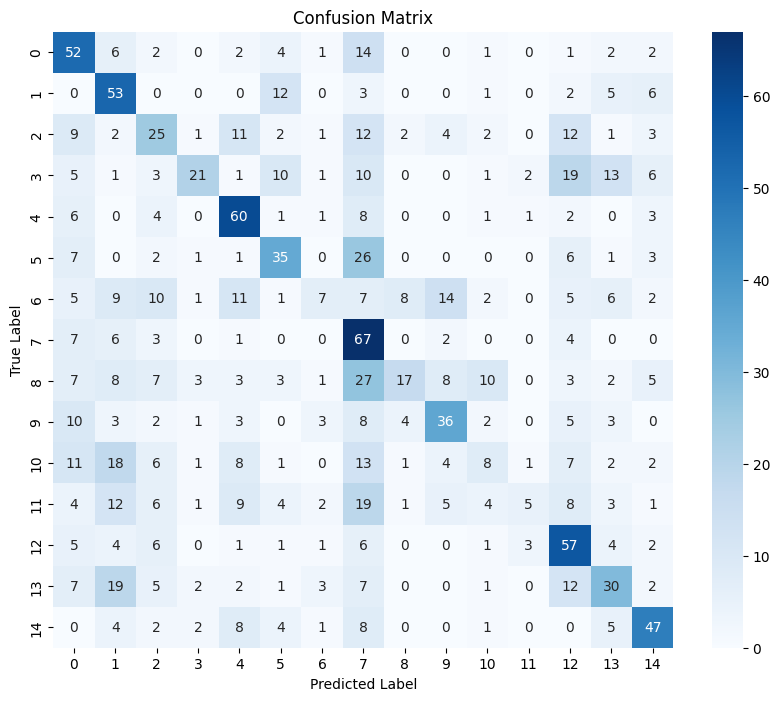

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

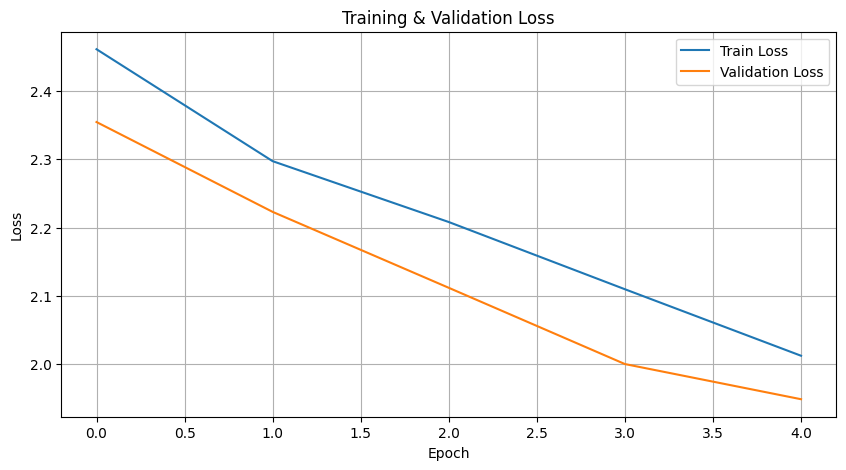

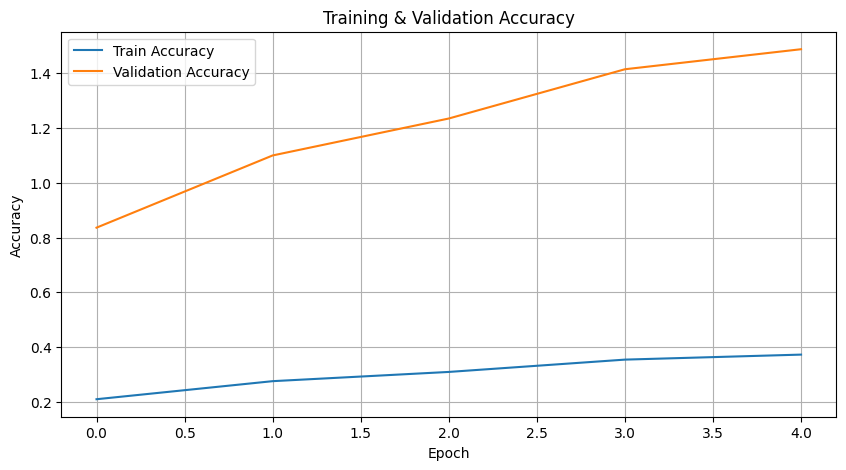

In [ ]:
# Krzywa strat
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Krzywa dokładności
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
